# Experiment Results

This page presents the results of a overall runtime of one week for each grammar.

## Details

- generation of inputs with [tribble](https://github.com/havrikov/tribble/)
- inputs generated from two grammars, one based on the current [URL standard](https://url.spec.whatwg.org/), the other one based on the RFC documents [RFC 3986](https://tools.ietf.org/html/rfc3986#appendix-A) and [RFC 6874](https://tools.ietf.org/html/rfc6874)
- experiment executed for both grammars with identical docker images
- for each run: 10 inputs selected at random from the generated inputs and added to the tests to execute
- run x contains all inputs used in runs 0..x-1 and 10 newly selected inputs
- execution of tests for 11 URL parsers:
    

*Language* | *URL Parser* | *Coverage Tool* 
--- | --- | ---
Firefox | nsURLParsers.cpp | grcov/genhtml
Chromium | url_parse.cc | coverage.py script
C | uriparser | LCOV 
C++ | POCO |LCOV 
Go | Package net/url | Package testing with coverage flags 
Java | java.net URL Class | JCOV 
JavaScript <br> | urijs <br> jsdom/whatwg-url| nyc/istanbul <br>
PHP | League URI | PHPUnit  
Python 3| urllib.parse | Coverage.py  
Ruby | Module URI |SimpleCov 

In [1]:
import sys
!{sys.executable} -m pip install pandas markdown matplotlib
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

You are using pip version 18.1, however version 21.1.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

ls_df=pd.read_csv("./livingstandard/coverages.csv", index_col='Run')

rfc_df=pd.read_csv("./rfc/coverages.csv", index_col='Run')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

parsers=ls_df.columns.values
colors_all = ['orange', 'darkblue', 'red', 'yellow', 'lightblue', 'purple', 'brown', 'grey', 'black', 'pink','green']
colors_comp = ['darkgreen', 'blue']
ms=22


## Living Standard Results

### Tabular View

In [3]:
ls_df.head(10)

,firefox,chromium,c,cpp,go,java,javascripturijs,javascriptwhatwg-url,php,python,ruby
Run,,,,,,,,,,,
0,64.700,40.040,44.800,32.300,73.400,38.000,26.520,52.160,39.660,38.000,72.020
1,67.200,42.110,47.100,34.100,73.400,38.000,27.380,57.530,39.660,42.000,72.020
2,67.200,42.110,47.300,34.500,73.600,38.000,27.380,58.720,39.660,42.000,72.020
3,67.200,42.110,49.200,34.600,73.600,38.000,27.380,58.720,39.660,42.000,72.020
4,67.200,42.110,50.700,34.600,74.800,38.000,27.380,58.720,39.660,44.000,72.020
5,67.200,42.110,50.700,34.800,74.800,38.000,27.730,58.720,39.660,44.000,72.020
6,67.200,42.110,50.700,34.800,75.800,38.000,27.730,58.720,41.380,44.000,72.020
7,67.200,43.230,51.200,34.800,75.800,38.000,27.730,60.510,41.380,44.000,72.020
8,67.200,43.230,51.200,34.800,75.800,38.000,27.730,60.510,41.380,44.000,72.020


In [4]:
ls_df.tail(10)

,firefox,chromium,c,cpp,go,java,javascripturijs,javascriptwhatwg-url,php,python,ruby
Run,,,,,,,,,,,
477,75.300,52.260,59.900,37.900,80.400,39.000,30.240,65.720,54.310,47.000,72.020
478,75.300,52.260,59.900,37.900,80.400,39.000,30.240,65.720,54.310,47.000,72.020
479,75.300,52.260,59.900,37.900,80.400,39.000,30.240,65.720,54.310,47.000,72.020
480,75.300,52.260,60.600,37.900,80.400,39.000,30.240,65.720,54.310,47.000,72.020
481,75.300,52.260,60.600,37.900,80.400,39.000,30.240,65.720,54.310,47.000,72.020
482,75.300,52.260,60.600,37.900,80.400,39.000,30.240,65.720,54.310,47.000,72.020
483,75.300,52.260,60.600,37.900,80.400,39.000,30.240,65.720,54.310,47.000,72.020
484,75.300,52.260,60.600,37.900,80.400,39.000,30.240,65.720,54.310,47.000,72.020
485,75.300,52.260,60.600,37.900,80.400,39.000,30.240,65.720,54.310,47.000,72.020


### Overview Plot

Text(0.5,0,'Run')

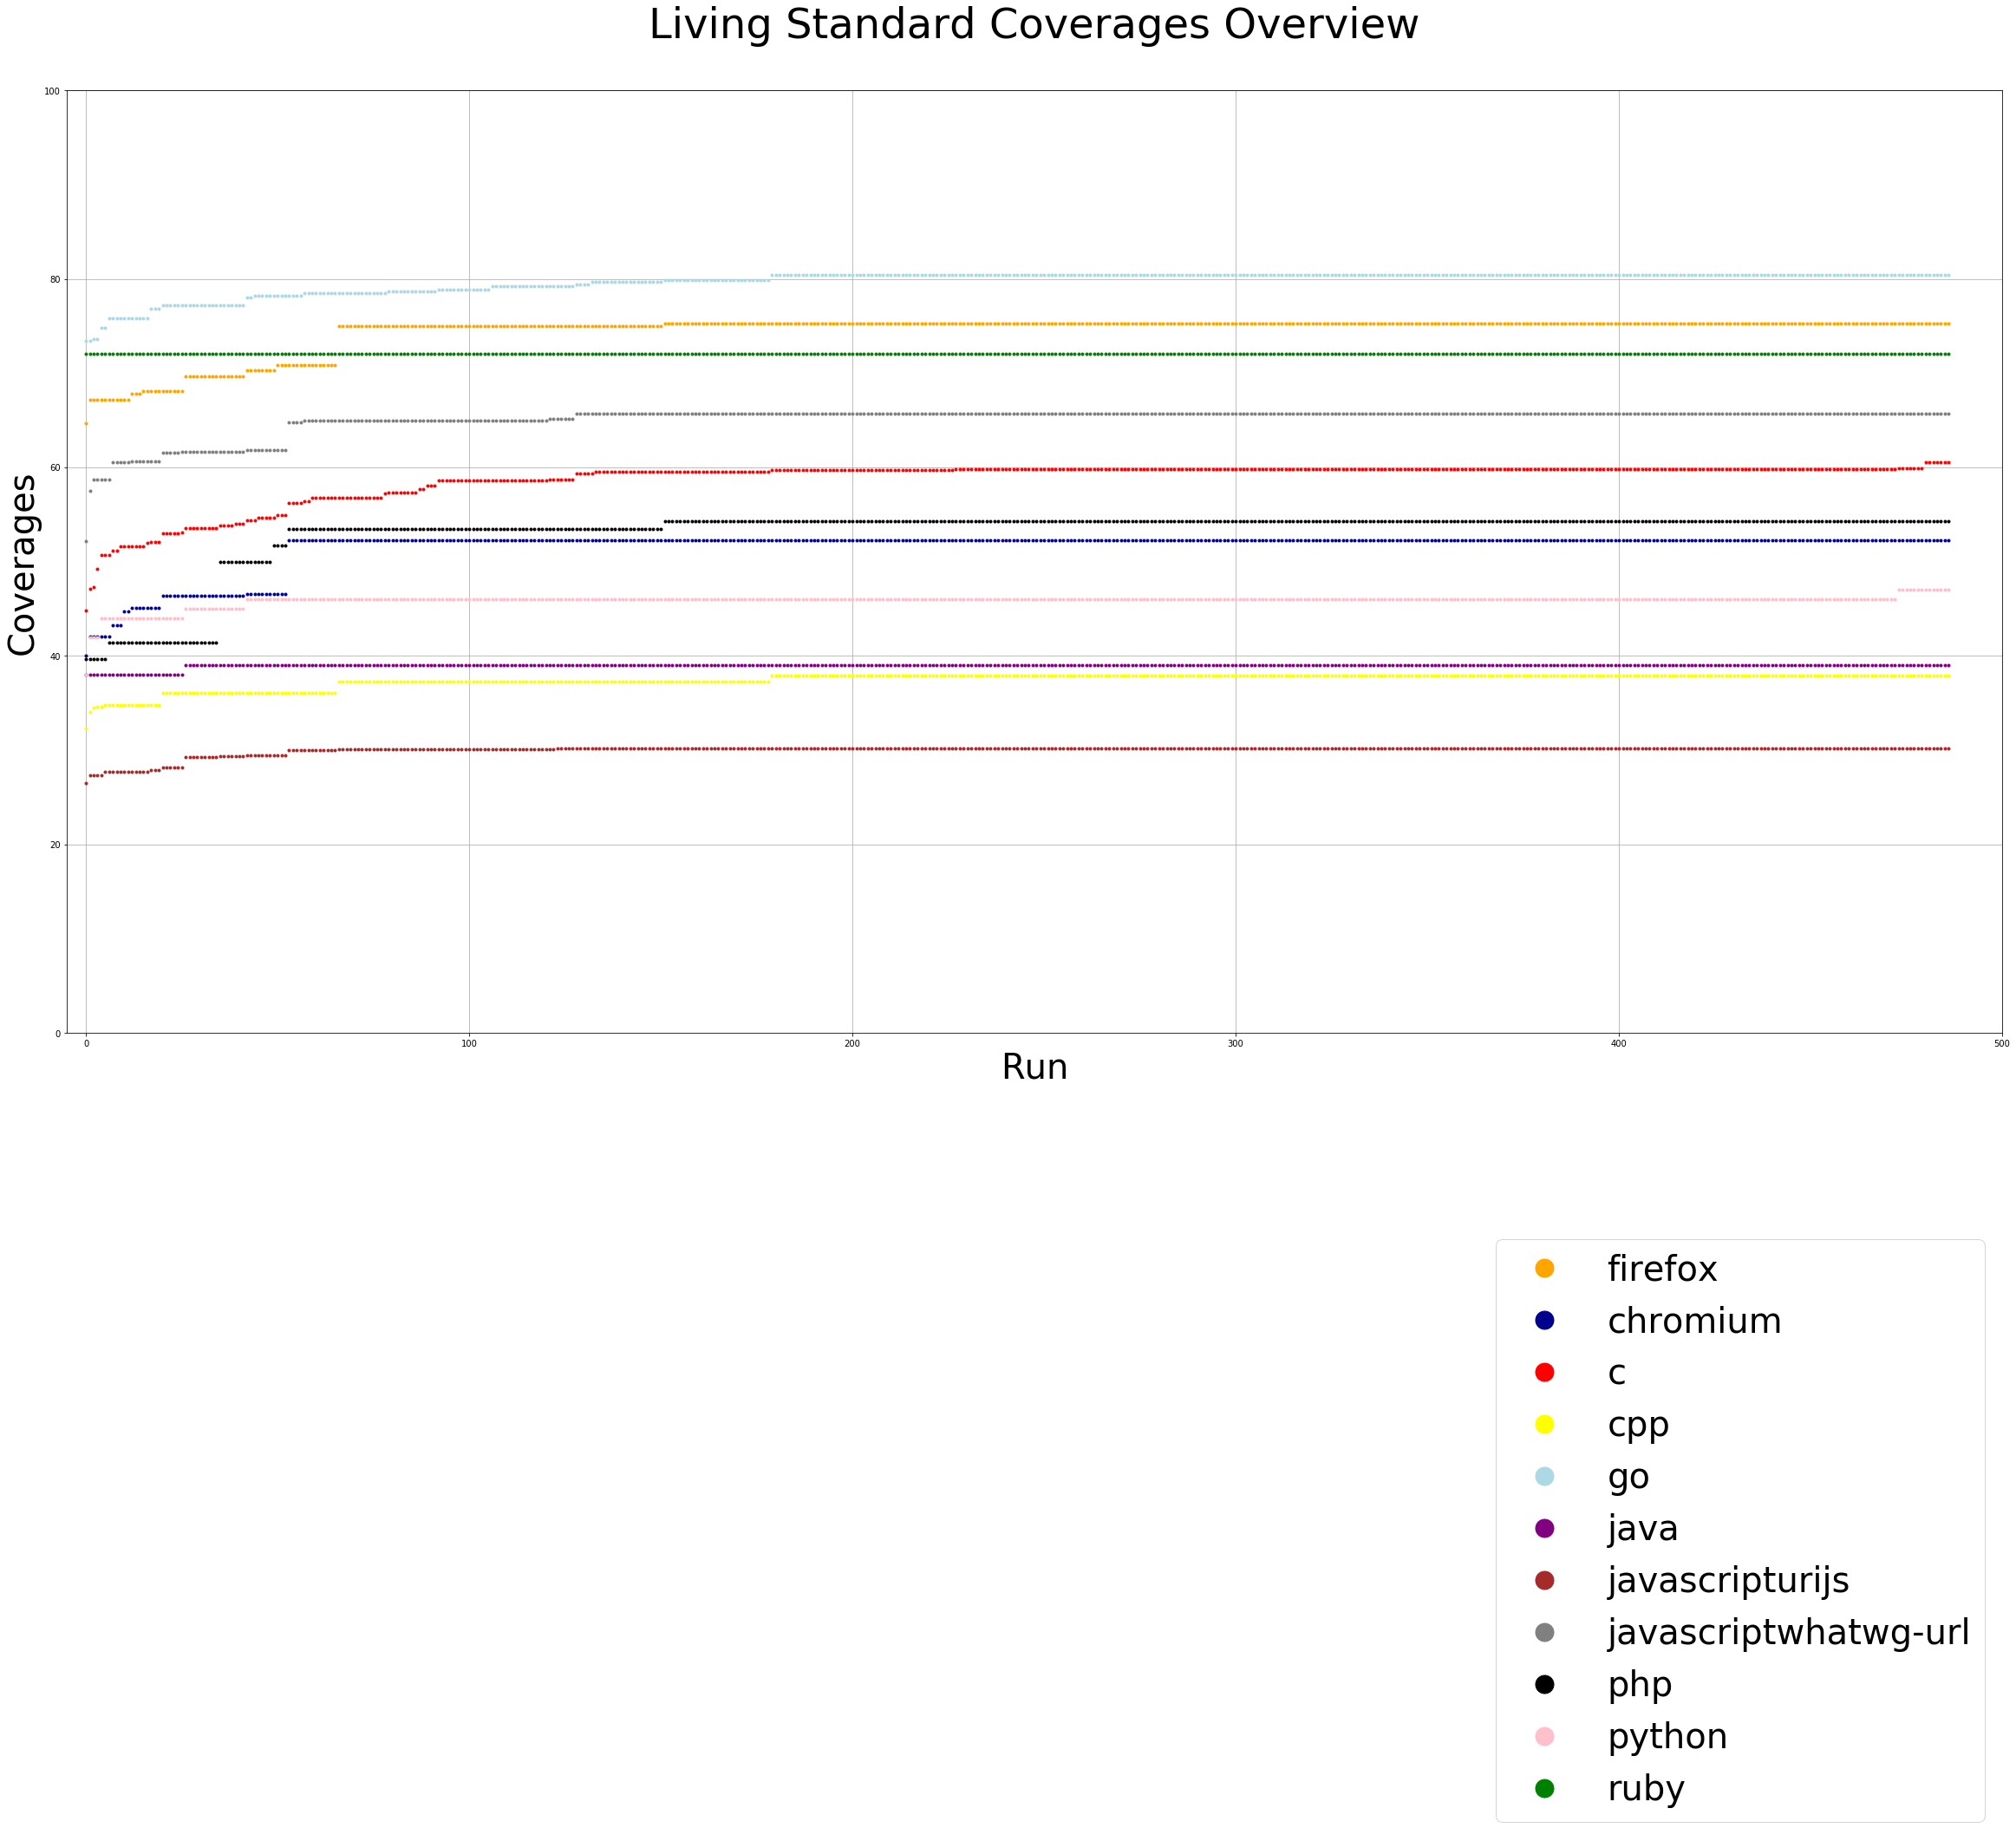

In [5]:

fig, axs=plt.subplots(figsize=(40,20))
plt.rcParams['font.size']='40'
plot=ls_df.plot(title="Living Standard Coverages Overview\n",ylim=(0,100),xlim=(-5,500), ax=axs,  color=colors_all, style=".")
plot.legend(bbox_to_anchor=(1,-0.2),markerscale=7.)
plot.grid(True)



axs.set_ylabel("Coverages", fontsize=40)
axs.set_xlabel("Run", fontsize=40)



### Detail Plot of the first 100 Runs

Text(0.5,0,'Run')

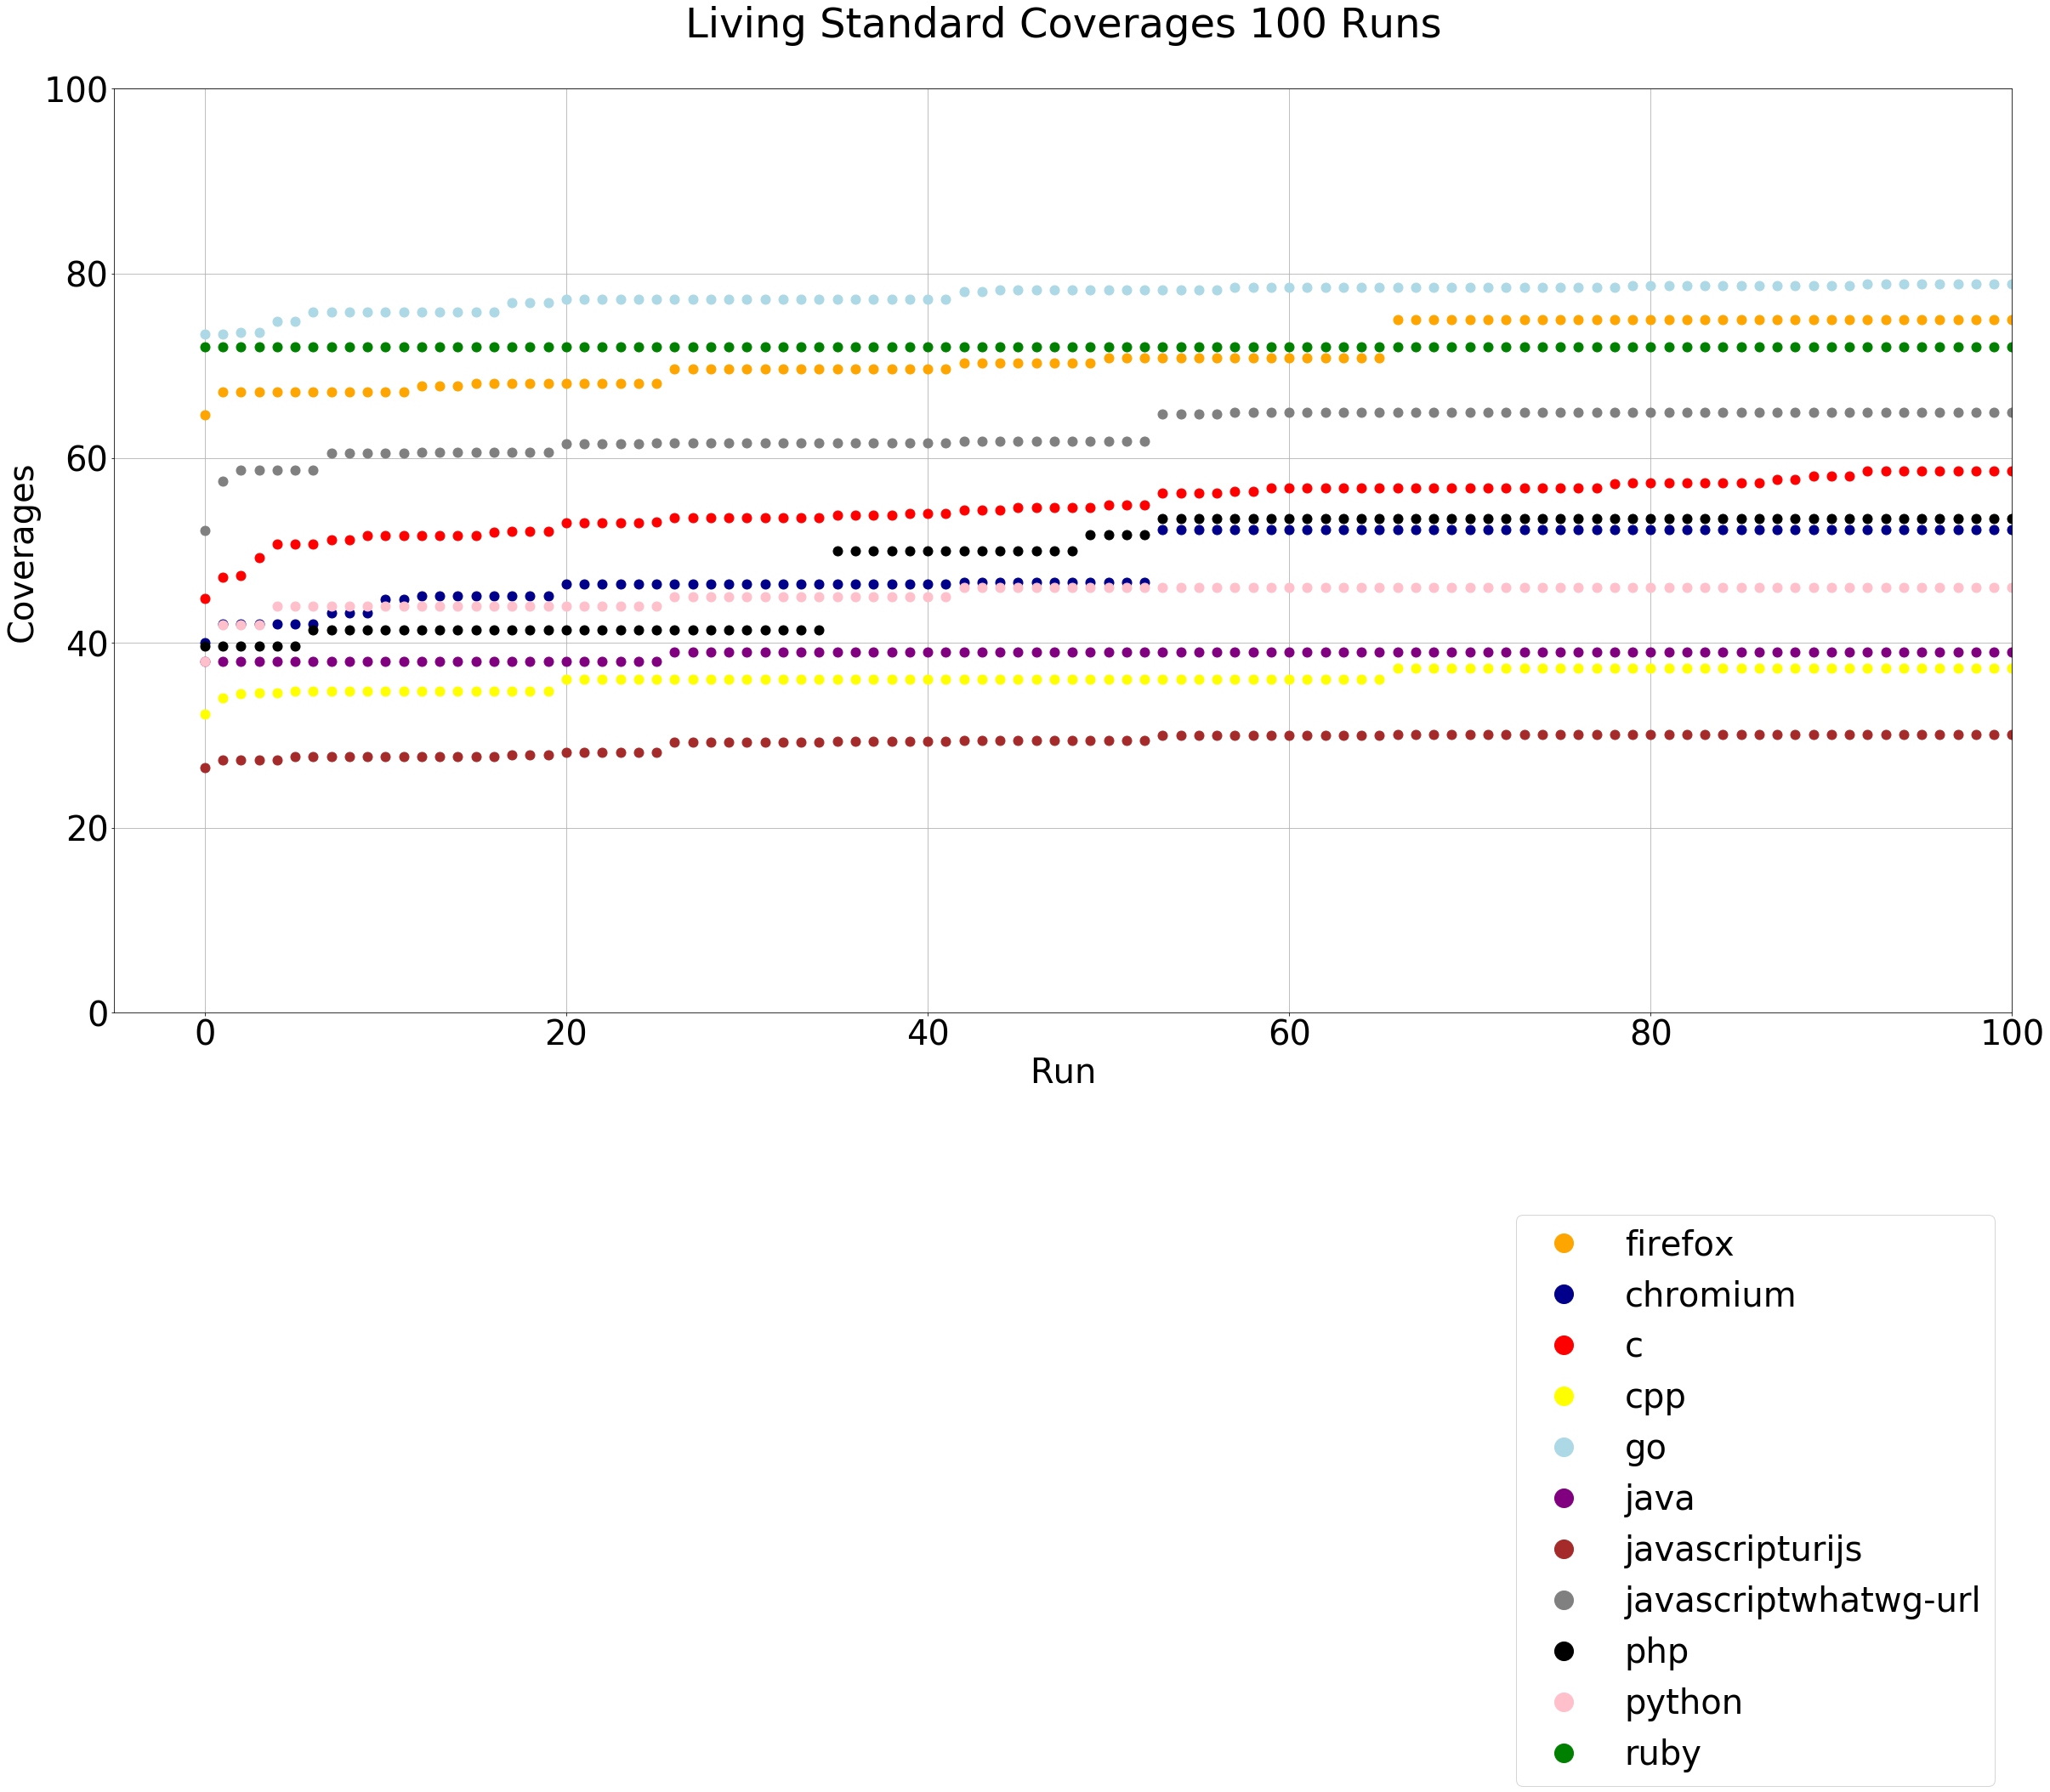

In [6]:
fig, axs=plt.subplots(figsize=(40,20))
plt.rcParams['font.size']='40'
plot=ls_df.plot(title="Living Standard Coverages 100 Runs\n",ylim=(0,100),xlim=(-5,100), ax=axs, style=".", ms=ms, color=colors_all)
plot.legend(bbox_to_anchor=(1,-0.2),markerscale=2.)
plot.grid(True)



axs.set_ylabel("Coverages", fontsize=40)
axs.set_xlabel("Run", fontsize=40)



### Statistics

In [7]:
ls_df.describe()

,firefox,chromium,c,cpp,go,java,javascripturijs,javascriptwhatwg-url,php,python,ruby
count,487.000,487.000,487.000,487.000,487.000,487.000,487.000,487.000,487.000,487.000,487.000
mean,74.423,51.515,58.681,37.455,79.688,38.947,29.984,65.083,53.041,45.864,72.020
std,2.136,2.204,2.352,0.807,1.266,0.225,0.568,1.575,3.428,0.674,0.000
min,64.700,40.040,44.800,32.300,73.400,38.000,26.520,52.160,39.660,38.000,72.020
25%,75.000,52.260,58.700,37.300,79.200,39.000,30.070,65.130,53.450,46.000,72.020
50%,75.300,52.260,59.800,37.900,80.400,39.000,30.160,65.720,54.310,46.000,72.020
75%,75.300,52.260,59.800,37.900,80.400,39.000,30.160,65.720,54.310,46.000,72.020
max,75.300,52.260,60.600,37.900,80.400,39.000,30.240,65.720,54.310,47.000,72.020


## RFC Results

### Tabular View

In [8]:
rfc_df.head(10)

,firefox,chromium,c,cpp,go,java,javascripturijs,javascriptwhatwg-url,php,python,ruby
Run,,,,,,,,,,,
0,48.100,13.720,27.700,17.100,68.500,36.000,18.200,30.700,42.240,32.000,68.910
1,48.100,13.720,31.500,17.100,68.500,36.000,18.200,30.700,46.550,32.000,68.910
2,48.100,13.720,35.000,17.200,68.500,36.000,18.200,31.450,46.550,33.000,68.910
3,48.100,13.720,35.800,17.200,68.500,36.000,18.200,34.280,46.550,33.000,68.910
4,48.100,13.720,36.400,17.200,68.500,36.000,18.200,34.280,46.550,33.000,68.910
5,48.100,13.720,39.400,17.200,70.900,36.000,18.630,34.280,48.280,33.000,68.910
6,48.100,13.720,39.400,17.200,70.900,36.000,18.630,34.280,48.280,33.000,68.910
7,48.100,14.850,39.700,17.200,70.900,36.000,18.630,36.210,48.280,33.000,68.910
8,48.100,16.170,41.600,19.600,71.400,36.000,18.800,37.110,48.280,33.000,68.910


In [9]:
rfc_df.tail(10)

,firefox,chromium,c,cpp,go,java,javascripturijs,javascriptwhatwg-url,php,python,ruby
Run,,,,,,,,,,,
477,48.100,16.350,50.500,21.400,76.800,37.000,19.320,40.240,63.790,34.000,68.910
478,48.100,16.350,50.500,21.400,76.800,37.000,19.320,40.240,63.790,34.000,68.910
479,48.100,16.350,50.500,21.400,76.800,37.000,19.320,40.240,63.790,34.000,68.910
480,48.100,16.350,50.500,21.400,76.800,37.000,19.320,40.240,63.790,34.000,68.910
481,48.100,16.350,50.500,21.400,76.800,37.000,19.320,40.240,63.790,34.000,68.910
482,48.100,16.350,50.500,21.400,76.800,37.000,19.320,40.240,63.790,34.000,68.910
483,48.100,16.350,50.500,21.400,76.800,37.000,19.320,40.240,63.790,34.000,68.910
484,48.100,16.350,50.500,21.400,76.800,37.000,19.320,40.240,63.790,34.000,68.910
485,48.100,16.350,50.500,21.400,76.800,37.000,19.320,40.240,63.790,34.000,68.910


### Overview Plot

Text(0.5,0,'Run')

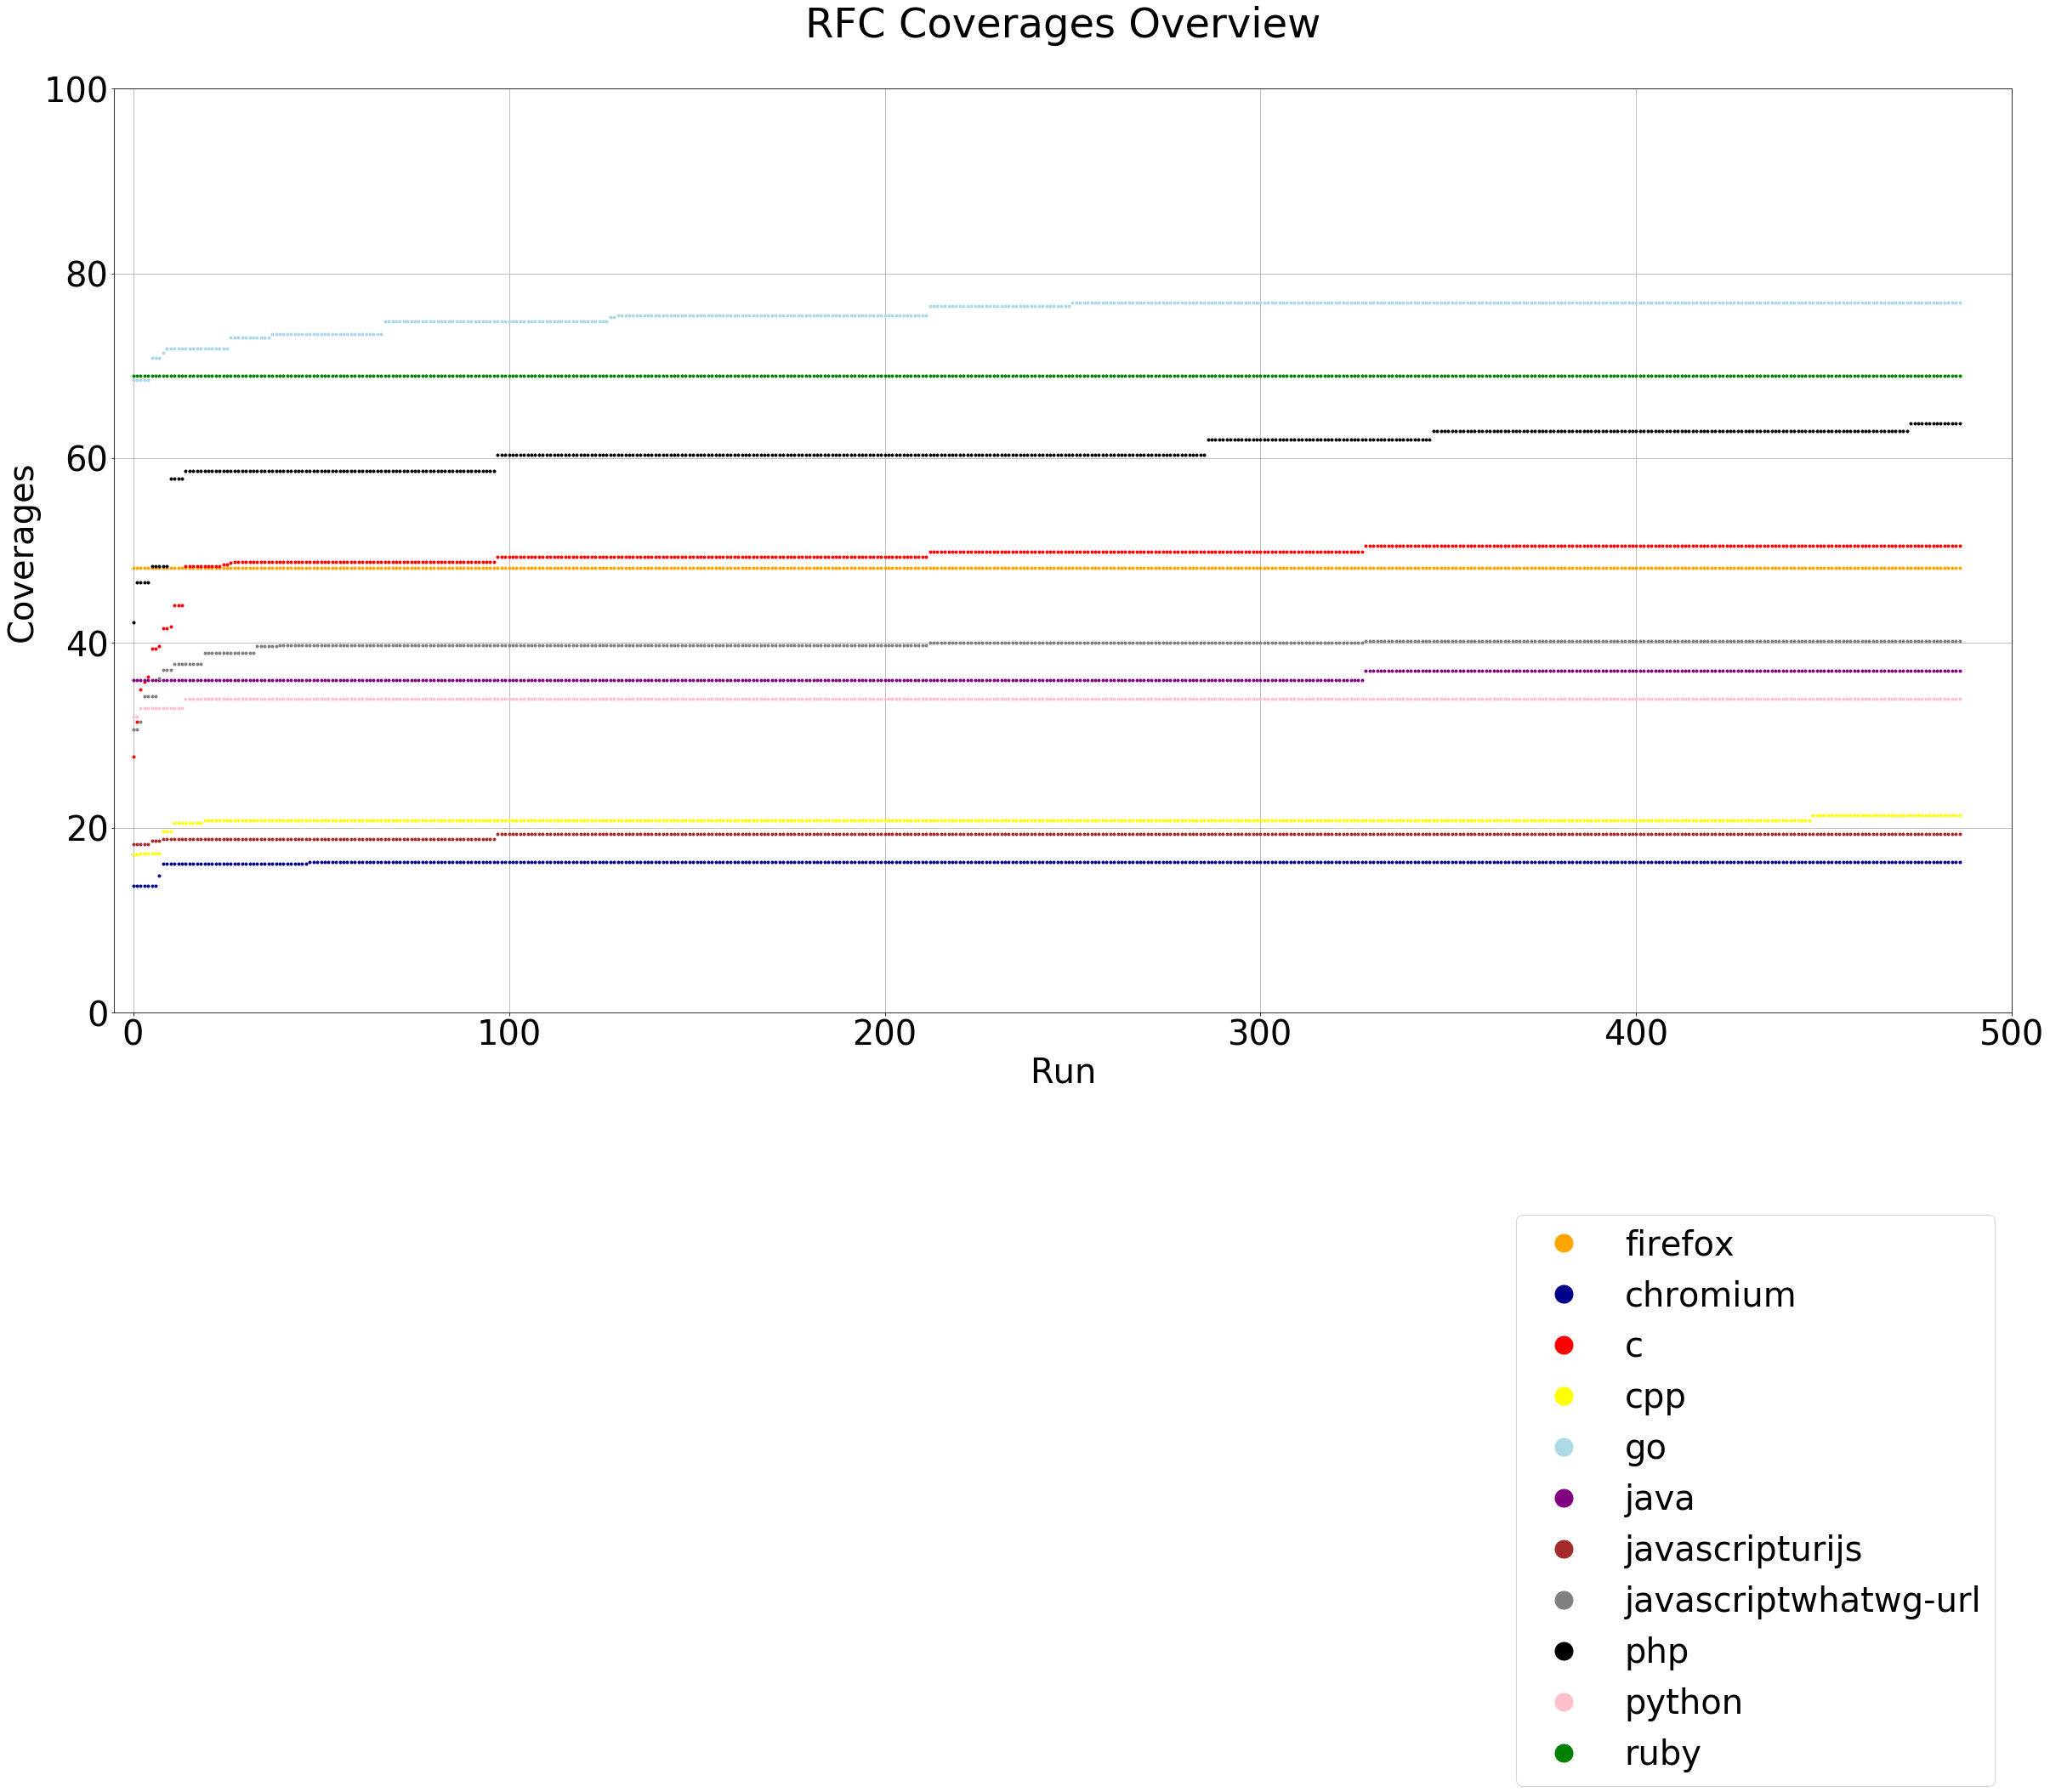

In [10]:
fig, axs=plt.subplots(figsize=(40,20))
plt.rcParams['font.size']='40'
plot=rfc_df.plot(title="RFC Coverages Overview\n",ylim=(0,100),xlim=(-5,500), ax=axs, style=".", color=colors_all)
plot.legend(bbox_to_anchor=(1,-0.2),markerscale=7.)
plot.grid(True)



axs.set_ylabel("Coverages", fontsize=40)
axs.set_xlabel("Run", fontsize=40)

### Detail Plot of the first 100 Runs

Text(0.5,0,'Run')

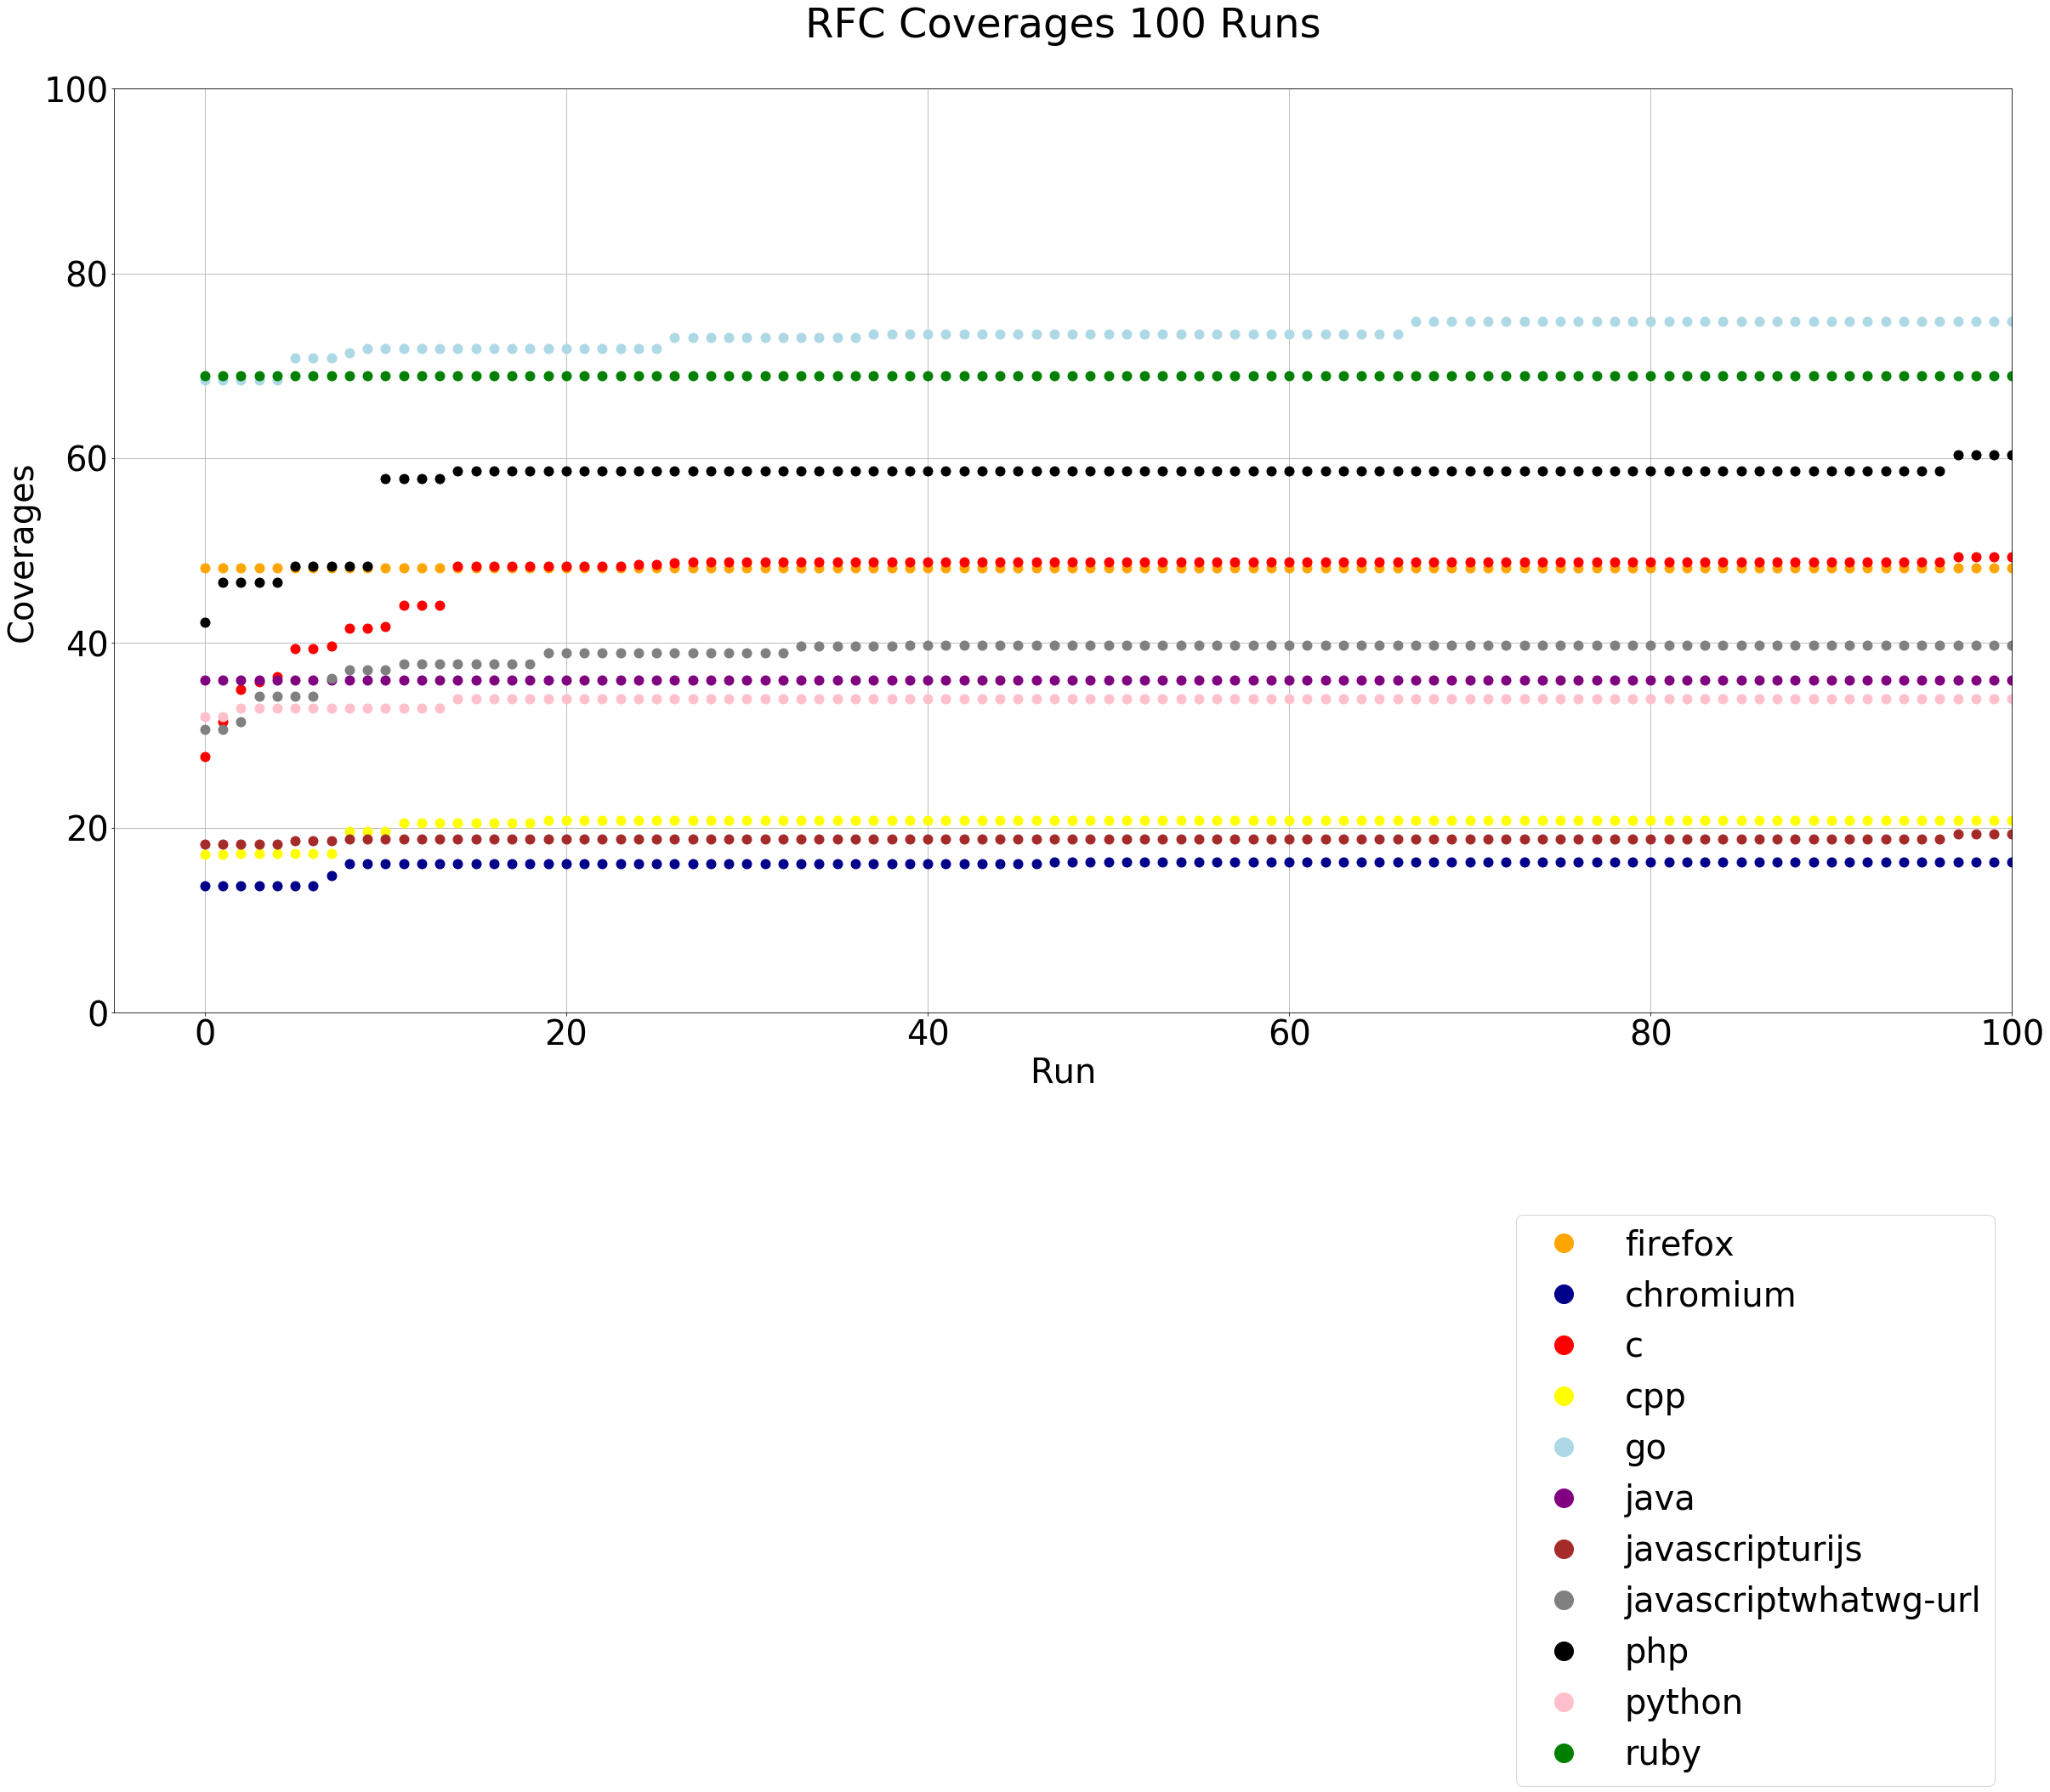

In [11]:
fig, axs=plt.subplots(figsize=(40,20))
plt.rcParams['font.size']='40'
plot=rfc_df.plot(title="RFC Coverages 100 Runs\n",ylim=(0,100),xlim=(-5,100), ax=axs, style=".", ms=ms, color=colors_all)
plot.legend(bbox_to_anchor=(1,-0.2),markerscale=2.)
plot.grid(True)



axs.set_ylabel("Coverages", fontsize=40)
axs.set_xlabel("Run", fontsize=40)



### Statistics

In [12]:
rfc_df.describe()

,firefox,chromium,c,cpp,go,java,javascripturijs,javascriptwhatwg-url,php,python,ruby
count,487.000,487.000,487.000,487.000,487.000,487.000,487.000,487.000,487.000,487.000,487.000
mean,48.100,16.295,49.434,20.777,75.706,36.326,19.209,39.823,60.739,33.967,68.910
std,0.000,0.322,2.114,0.506,1.564,0.469,0.230,0.993,2.569,0.200,0.000
min,48.100,13.720,27.700,17.100,68.500,36.000,18.200,30.700,42.240,32.000,68.910
25%,48.100,16.350,49.300,20.800,74.800,36.000,19.320,39.790,60.340,34.000,68.910
50%,48.100,16.350,49.900,20.800,76.500,36.000,19.320,40.090,60.340,34.000,68.910
75%,48.100,16.350,50.500,20.800,76.800,37.000,19.320,40.240,62.930,34.000,68.910
max,48.100,16.350,50.500,21.400,76.800,37.000,19.320,40.240,63.790,34.000,68.910


## Direct Comparison for each used Parser


In [13]:
from IPython.display import display, Markdown

ffexcov=74.4
ffwptcov=84.4
chrexcov=83.65
chrwptcov=64.29


def compareGrammarResults(parser, df1, newcolumn1, df2, newcolumn2):
    display(Markdown("### "+parser.capitalize()))
    fig, axs=plt.subplots(figsize=(40,20))
    plt.rcParams['font.size']='40'

    new_df=pd.DataFrame()
    new_df[newcolumn1]=df1[parser]
    new_df[newcolumn2]=df2[parser]

    plot=new_df.plot(title=parser.capitalize()+" Coverages\n",ylim=(0,100),xlim=(-5,500), ax=axs, style=".", color=colors_comp, ms=ms)
    
    plot.grid(True)
    

    axs.set_ylabel("Coverages", fontsize=40)
    axs.set_xlabel("Run", fontsize=40)
    otherTests=""
    
    if parser=='firefox':
        plot.axhline(y=ffexcov, color='black', linestyle='-', lw=4, label='Existing Test Files')
        otherTests+="Existing Test Files Coverage: "+str(ffexcov)+"%"
        plot.axhline(y=ffwptcov, color='y', linestyle='-', lw=4, label='WPT tests')
        otherTests+="\nWeb platform tests Coverage: "+str(ffwptcov)+"%"
    if parser=='chromium':
        plot.axhline(y=chrexcov, color='black', linestyle='-', lw=4, label='Existing Test Files')
        otherTests+="Existing Test Files Coverage: "+str(chrexcov)+"%"
        plot.axhline(y=chrwptcov, color='y', linestyle='-', lw=4, label='WPT tests')
        otherTests+="\nWeb platform tests Coverage: "+str(chrwptcov)+"%"
    plot.legend(loc='best',markerscale=2.)
    plt.show()
    display(new_df.describe())

    print(newcolumn1+" Max Coverage: "+str(new_df[newcolumn1].max())+"%")
    print(newcolumn1+" Max Coverage reached in: run "+str(new_df[newcolumn1].idxmax()))
    print(newcolumn2+" Max Coverage: "+str(new_df[newcolumn2].max())+"%")
    print(newcolumn2+" Coverage reached in: run "+str(new_df[newcolumn2].idxmax()))
    print(otherTests)
    return new_df


### Firefox

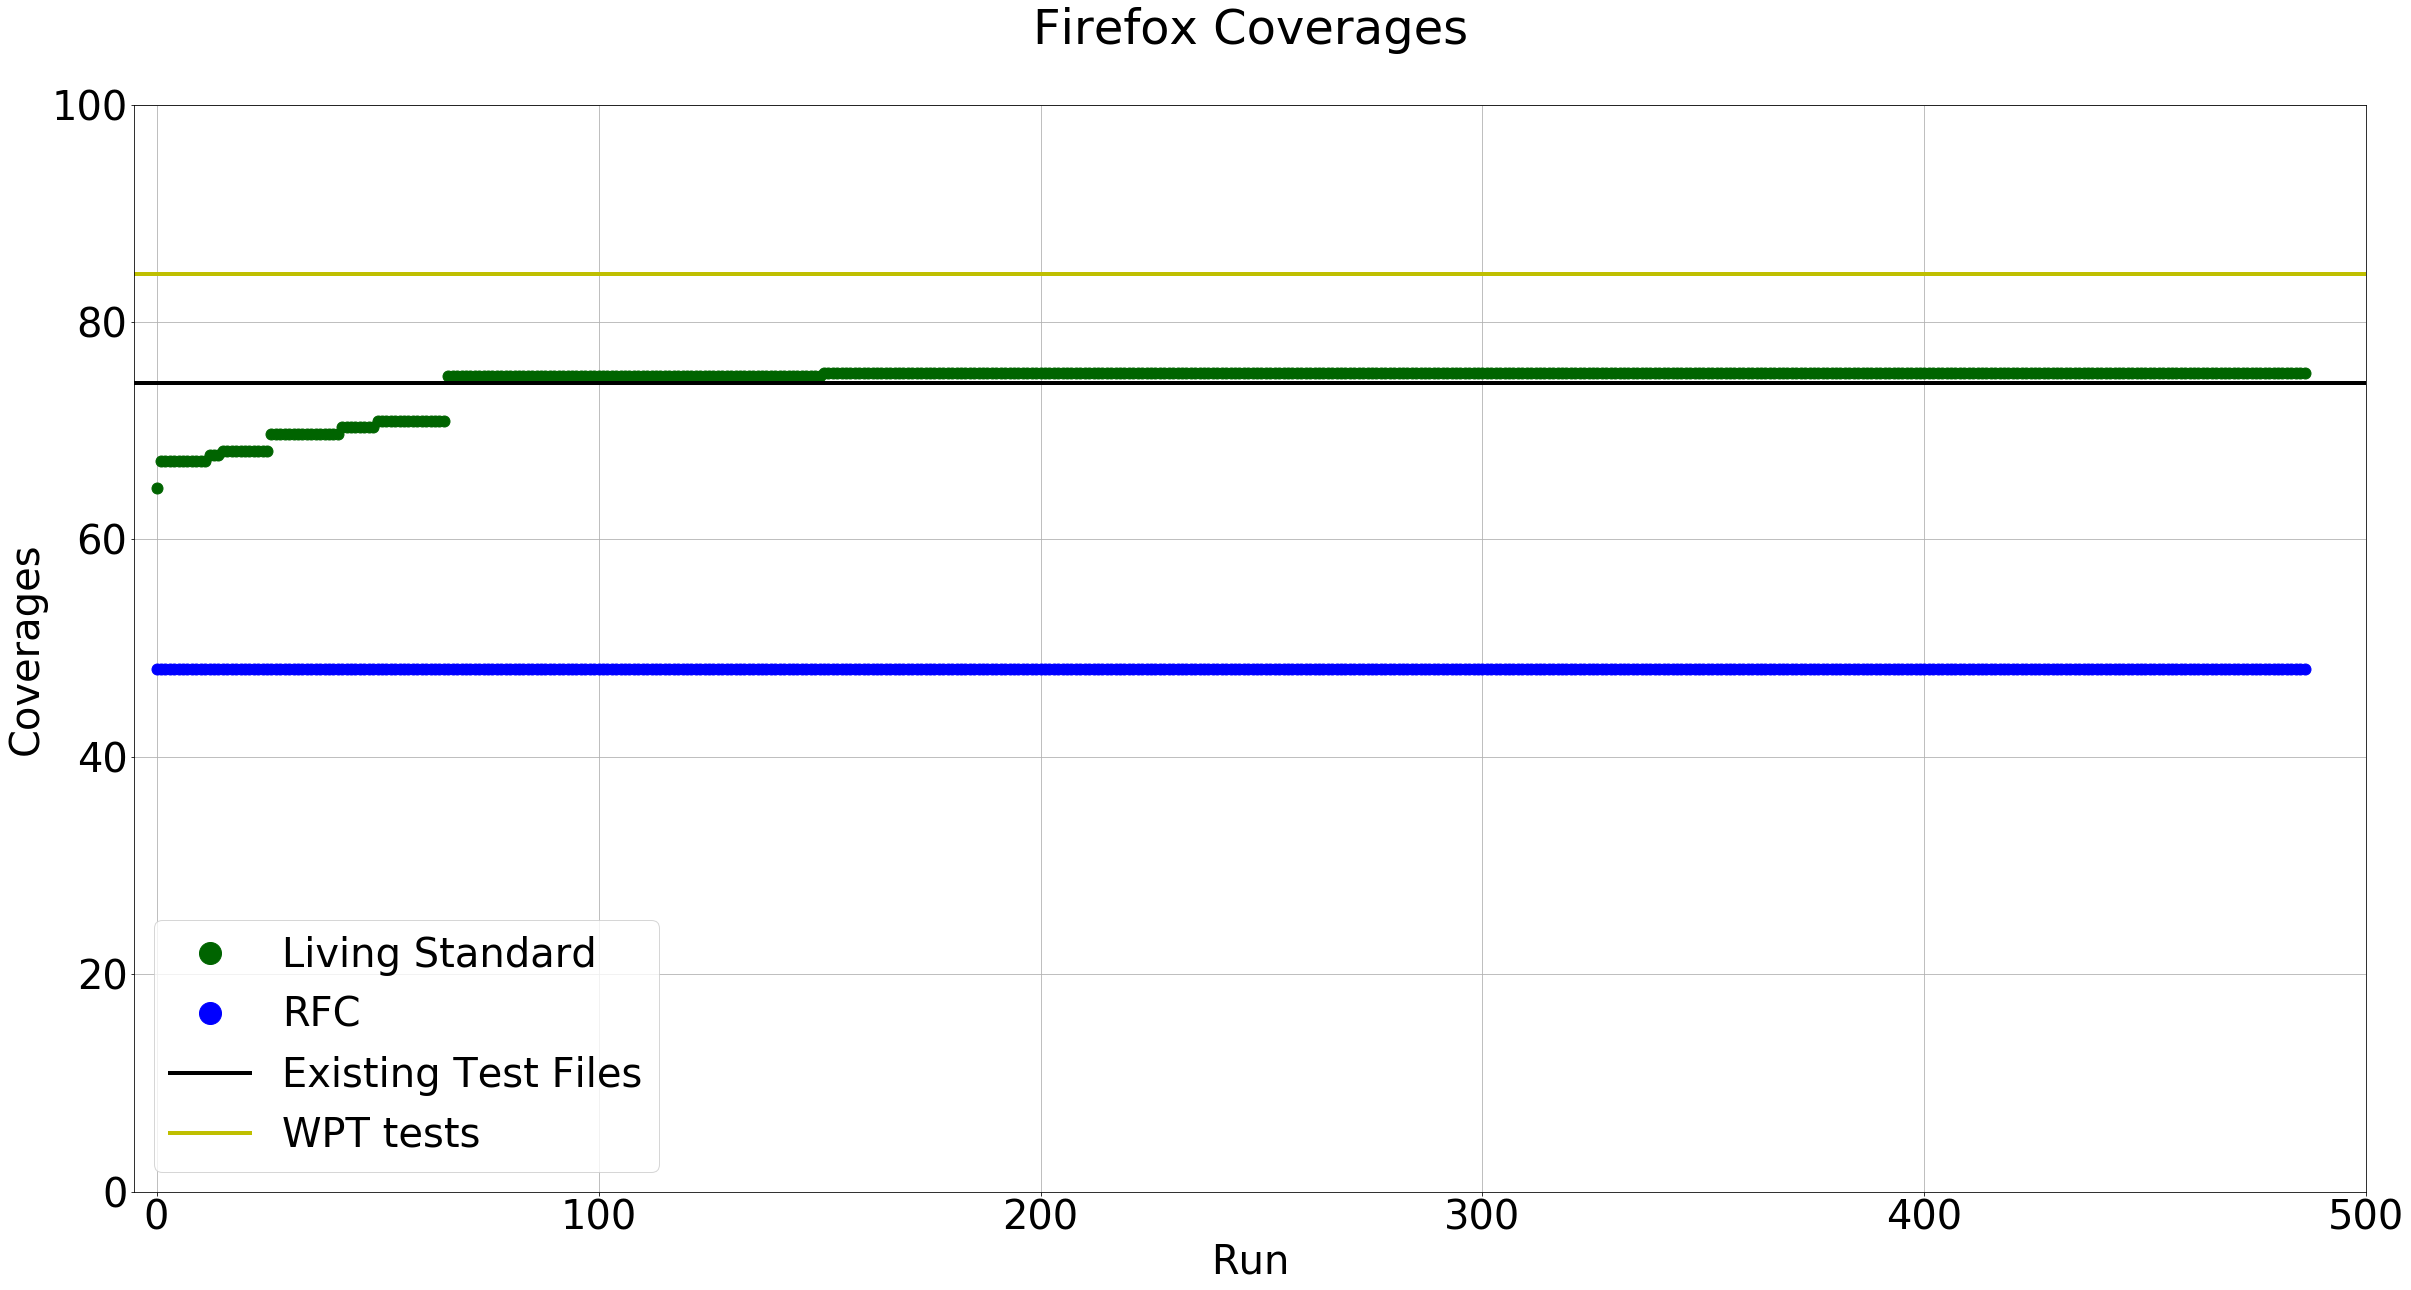

,Living Standard,RFC
count,487.000,487.000
mean,74.423,48.100
std,2.136,0.000
min,64.700,48.100
25%,75.000,48.100
50%,75.300,48.100
75%,75.300,48.100
max,75.300,48.100


Living Standard Max Coverage: 75.3%
Living Standard Max Coverage reached in: run 151
RFC Max Coverage: 48.1%
RFC Coverage reached in: run 0
Existing Test Files Coverage: 74.4%
Web platform tests Coverage: 84.4%


### Chromium

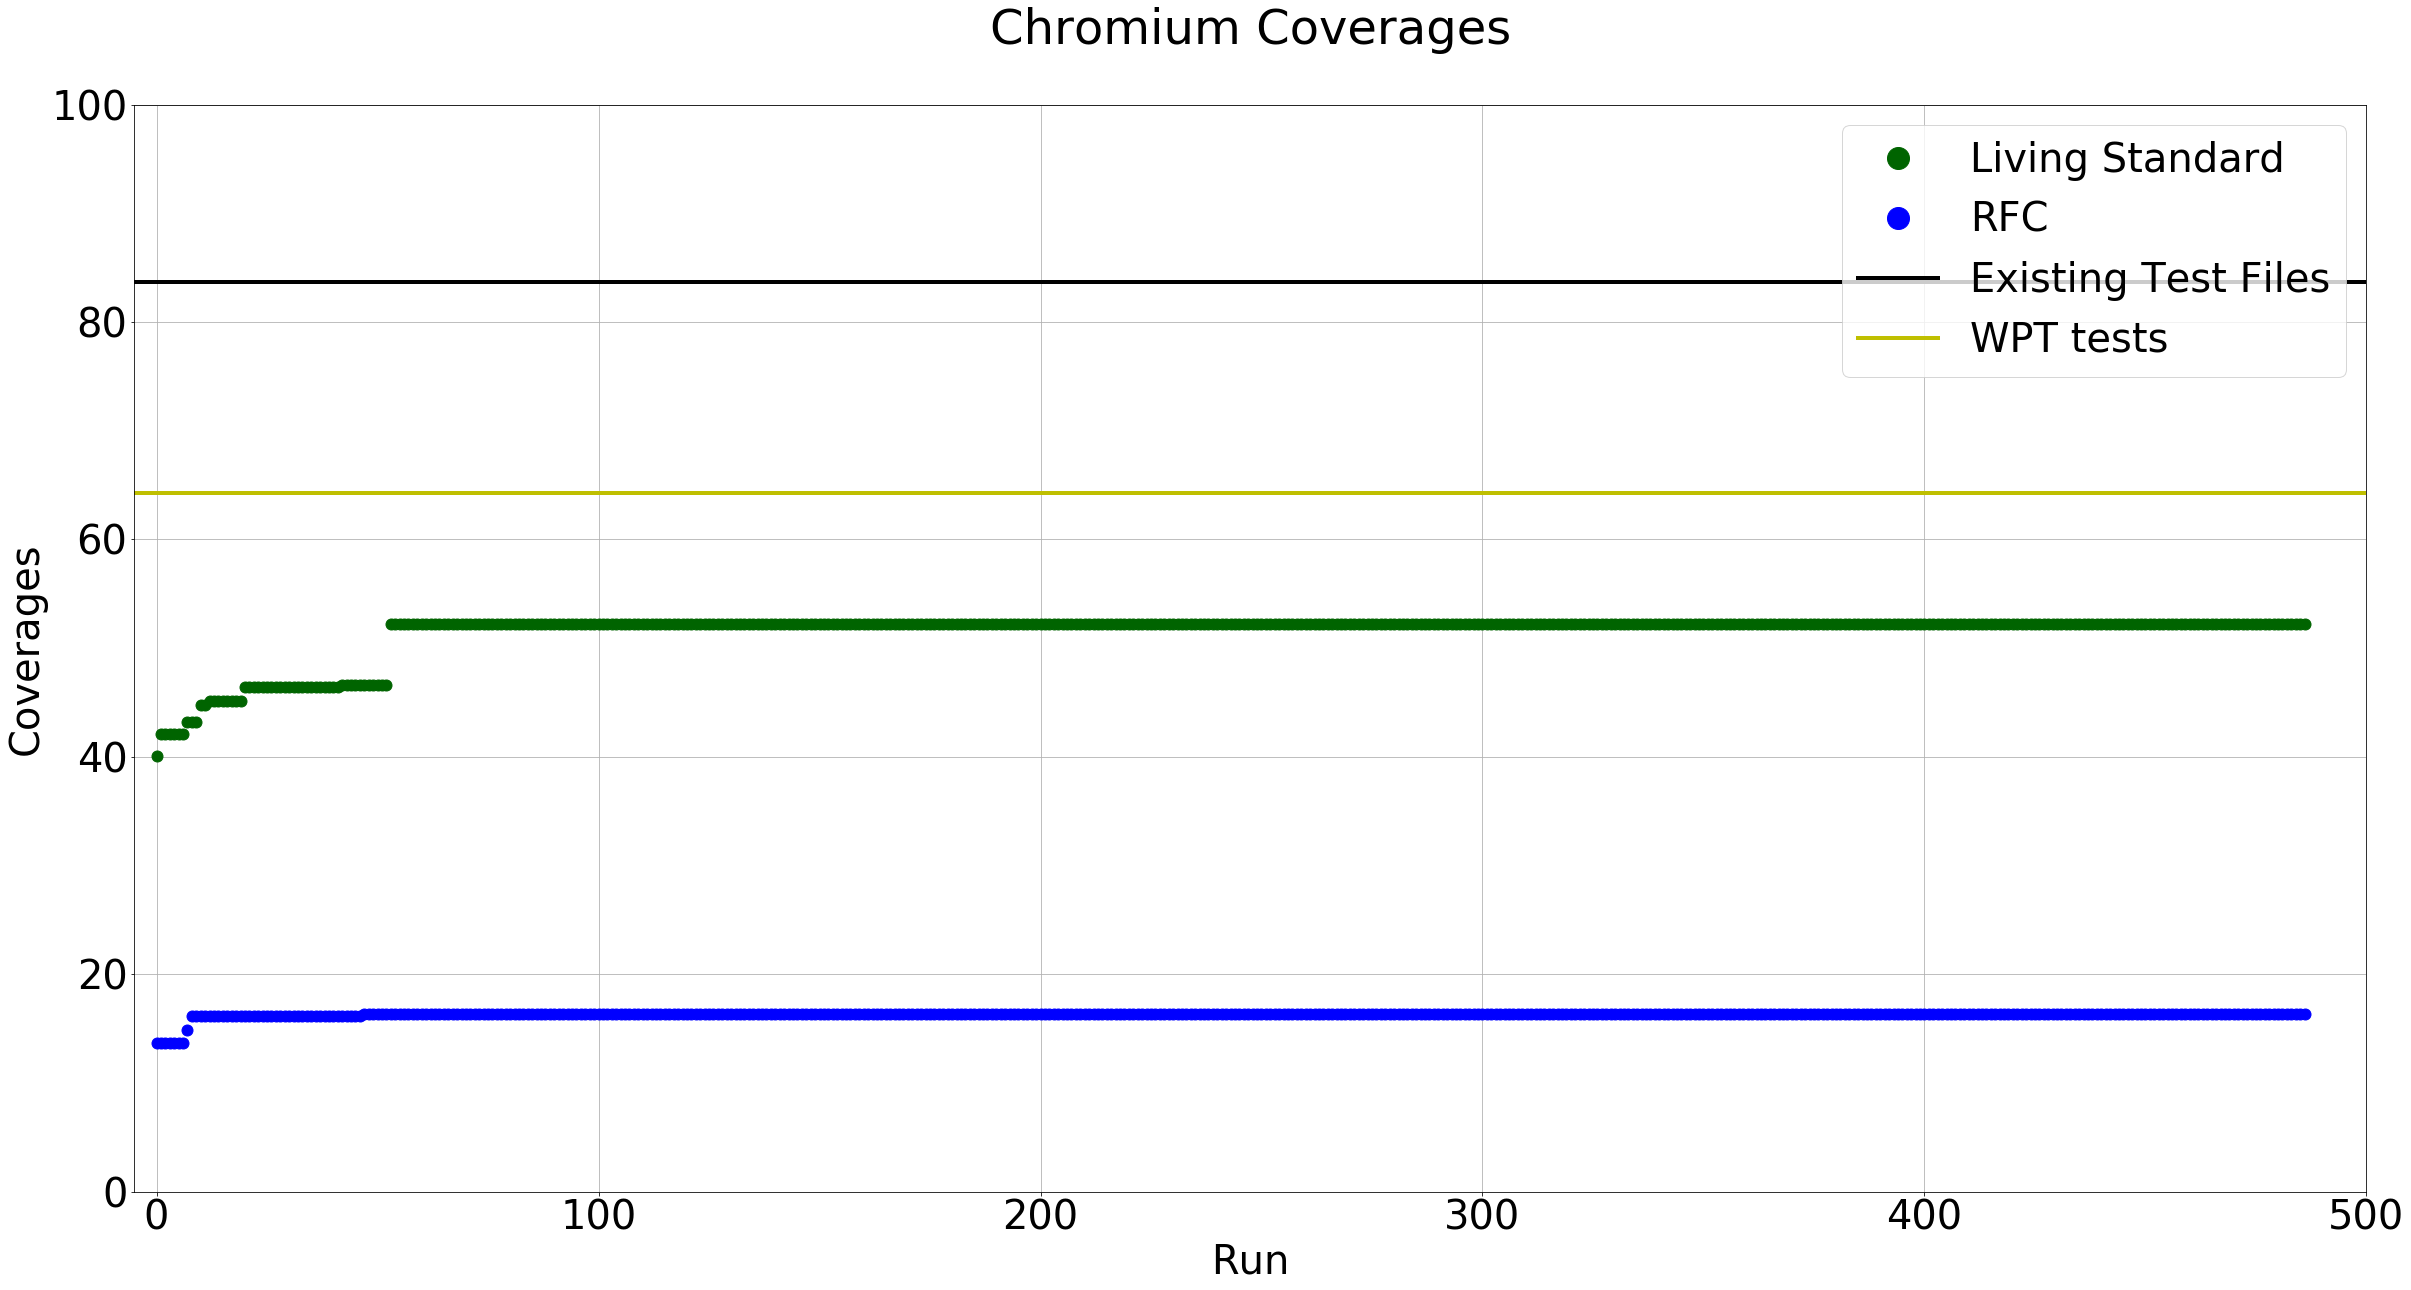

,Living Standard,RFC
count,487.000,487.000
mean,51.515,16.295
std,2.204,0.322
min,40.040,13.720
25%,52.260,16.350
50%,52.260,16.350
75%,52.260,16.350
max,52.260,16.350


Living Standard Max Coverage: 52.26%
Living Standard Max Coverage reached in: run 53
RFC Max Coverage: 16.35%
RFC Coverage reached in: run 47
Existing Test Files Coverage: 83.65%
Web platform tests Coverage: 64.29%


### C

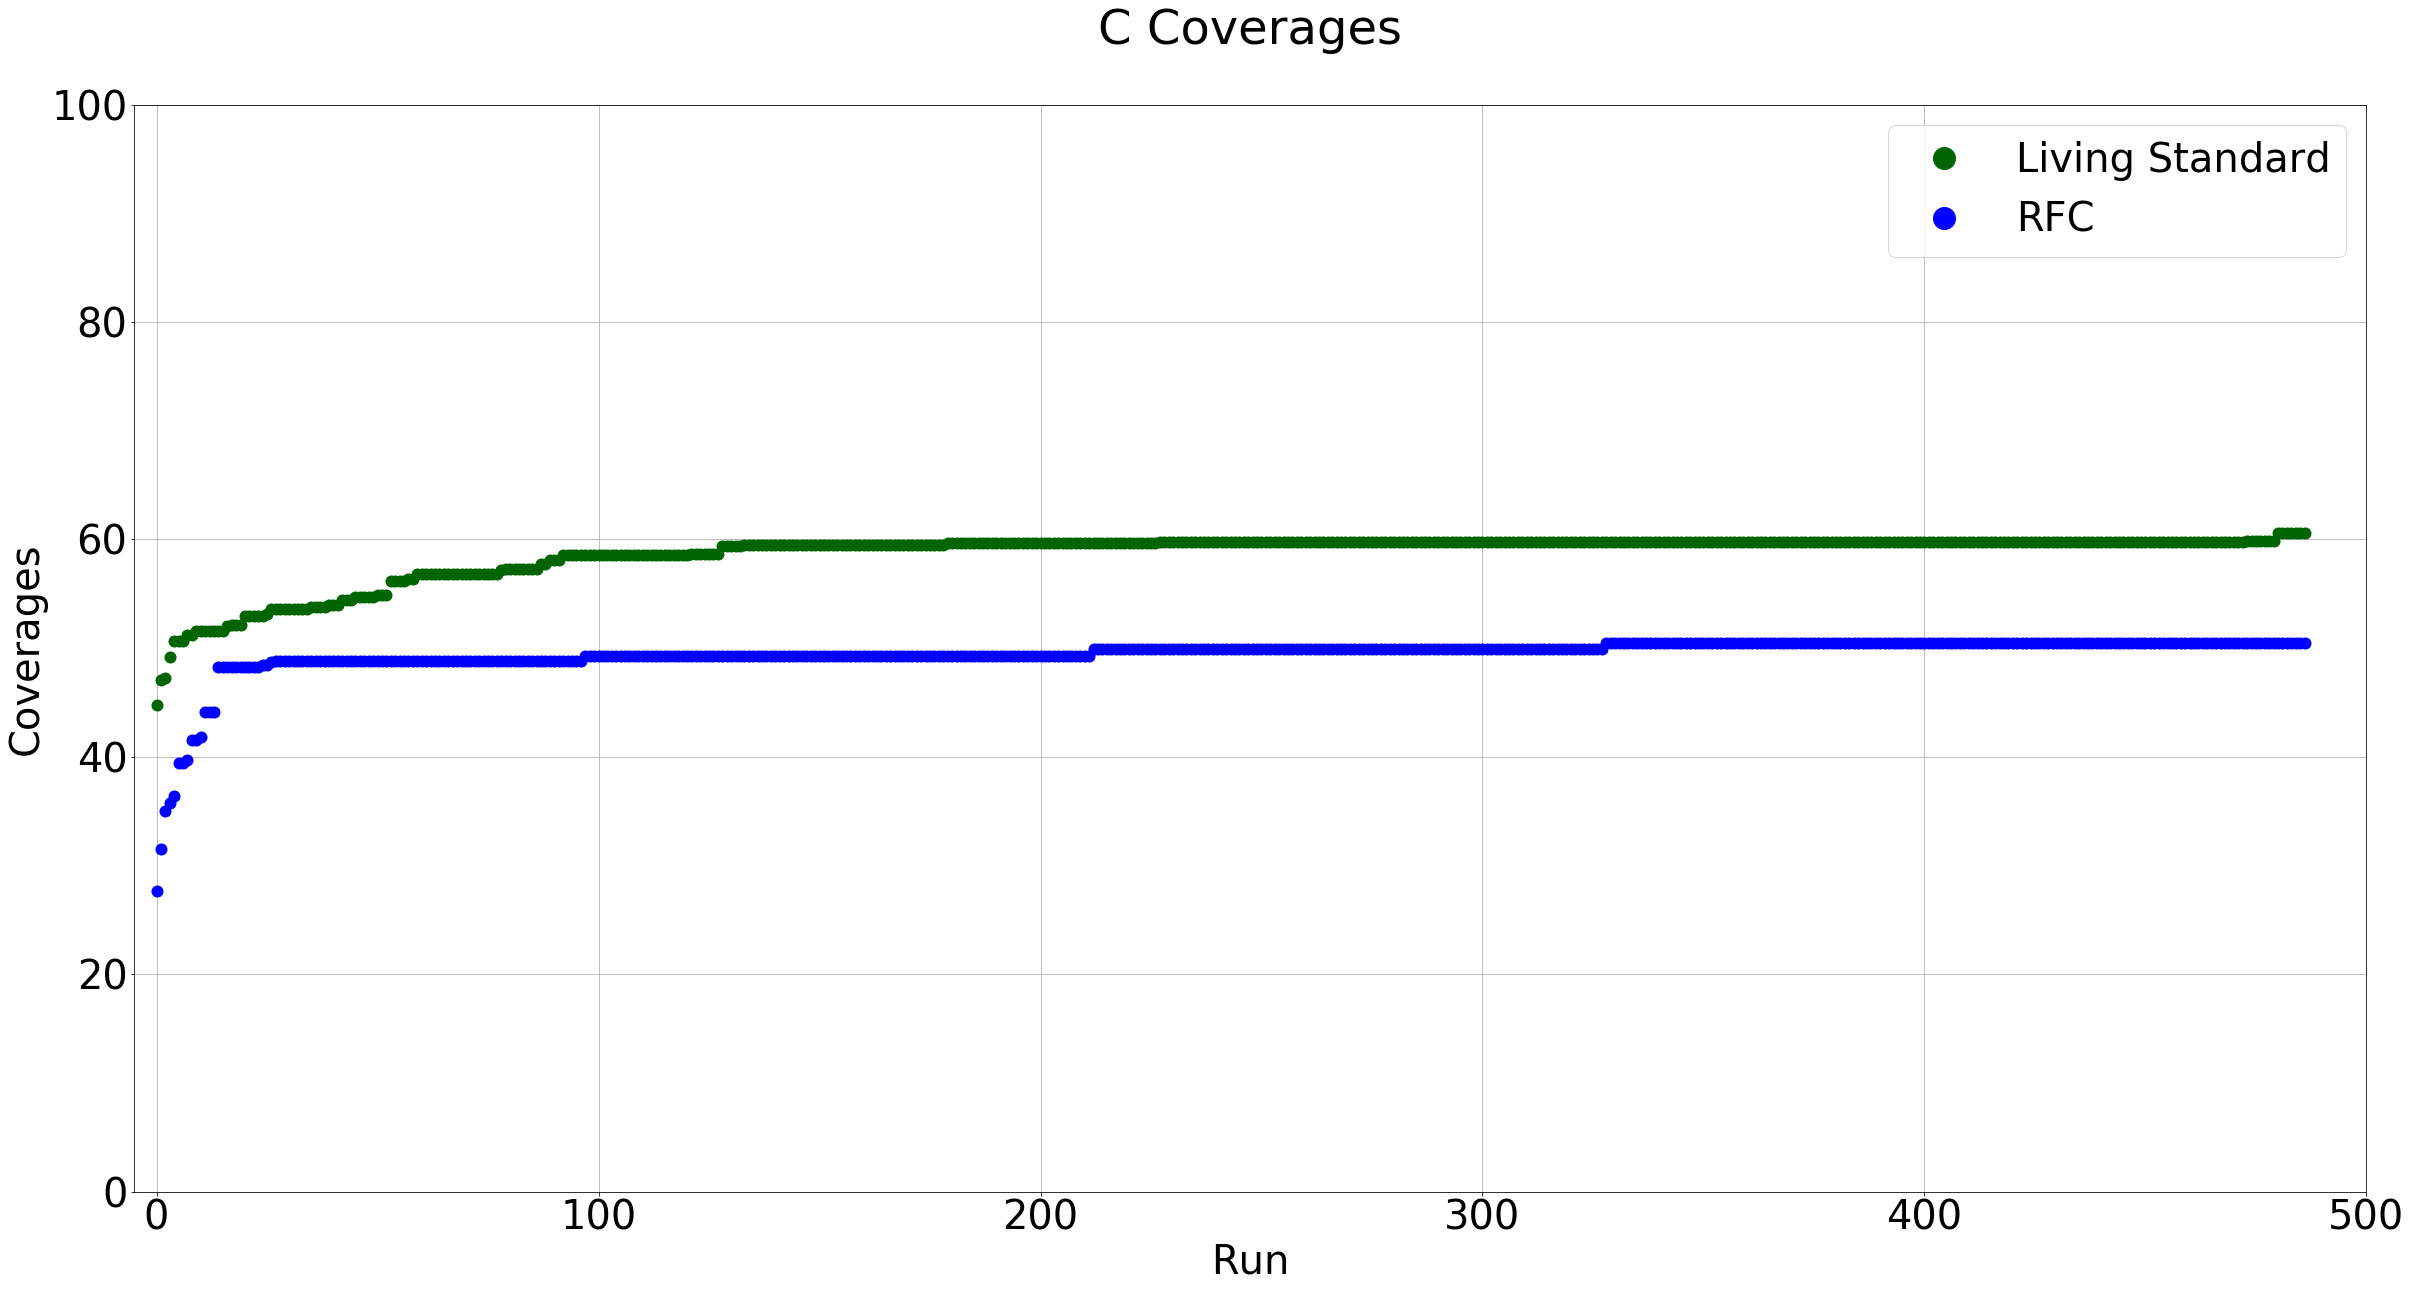

,Living Standard,RFC
count,487.000,487.000
mean,58.681,49.434
std,2.352,2.114
min,44.800,27.700
25%,58.700,49.300
50%,59.800,49.900
75%,59.800,50.500
max,60.600,50.500


Living Standard Max Coverage: 60.6%
Living Standard Max Coverage reached in: run 480
RFC Max Coverage: 50.5%
RFC Coverage reached in: run 328



### Cpp

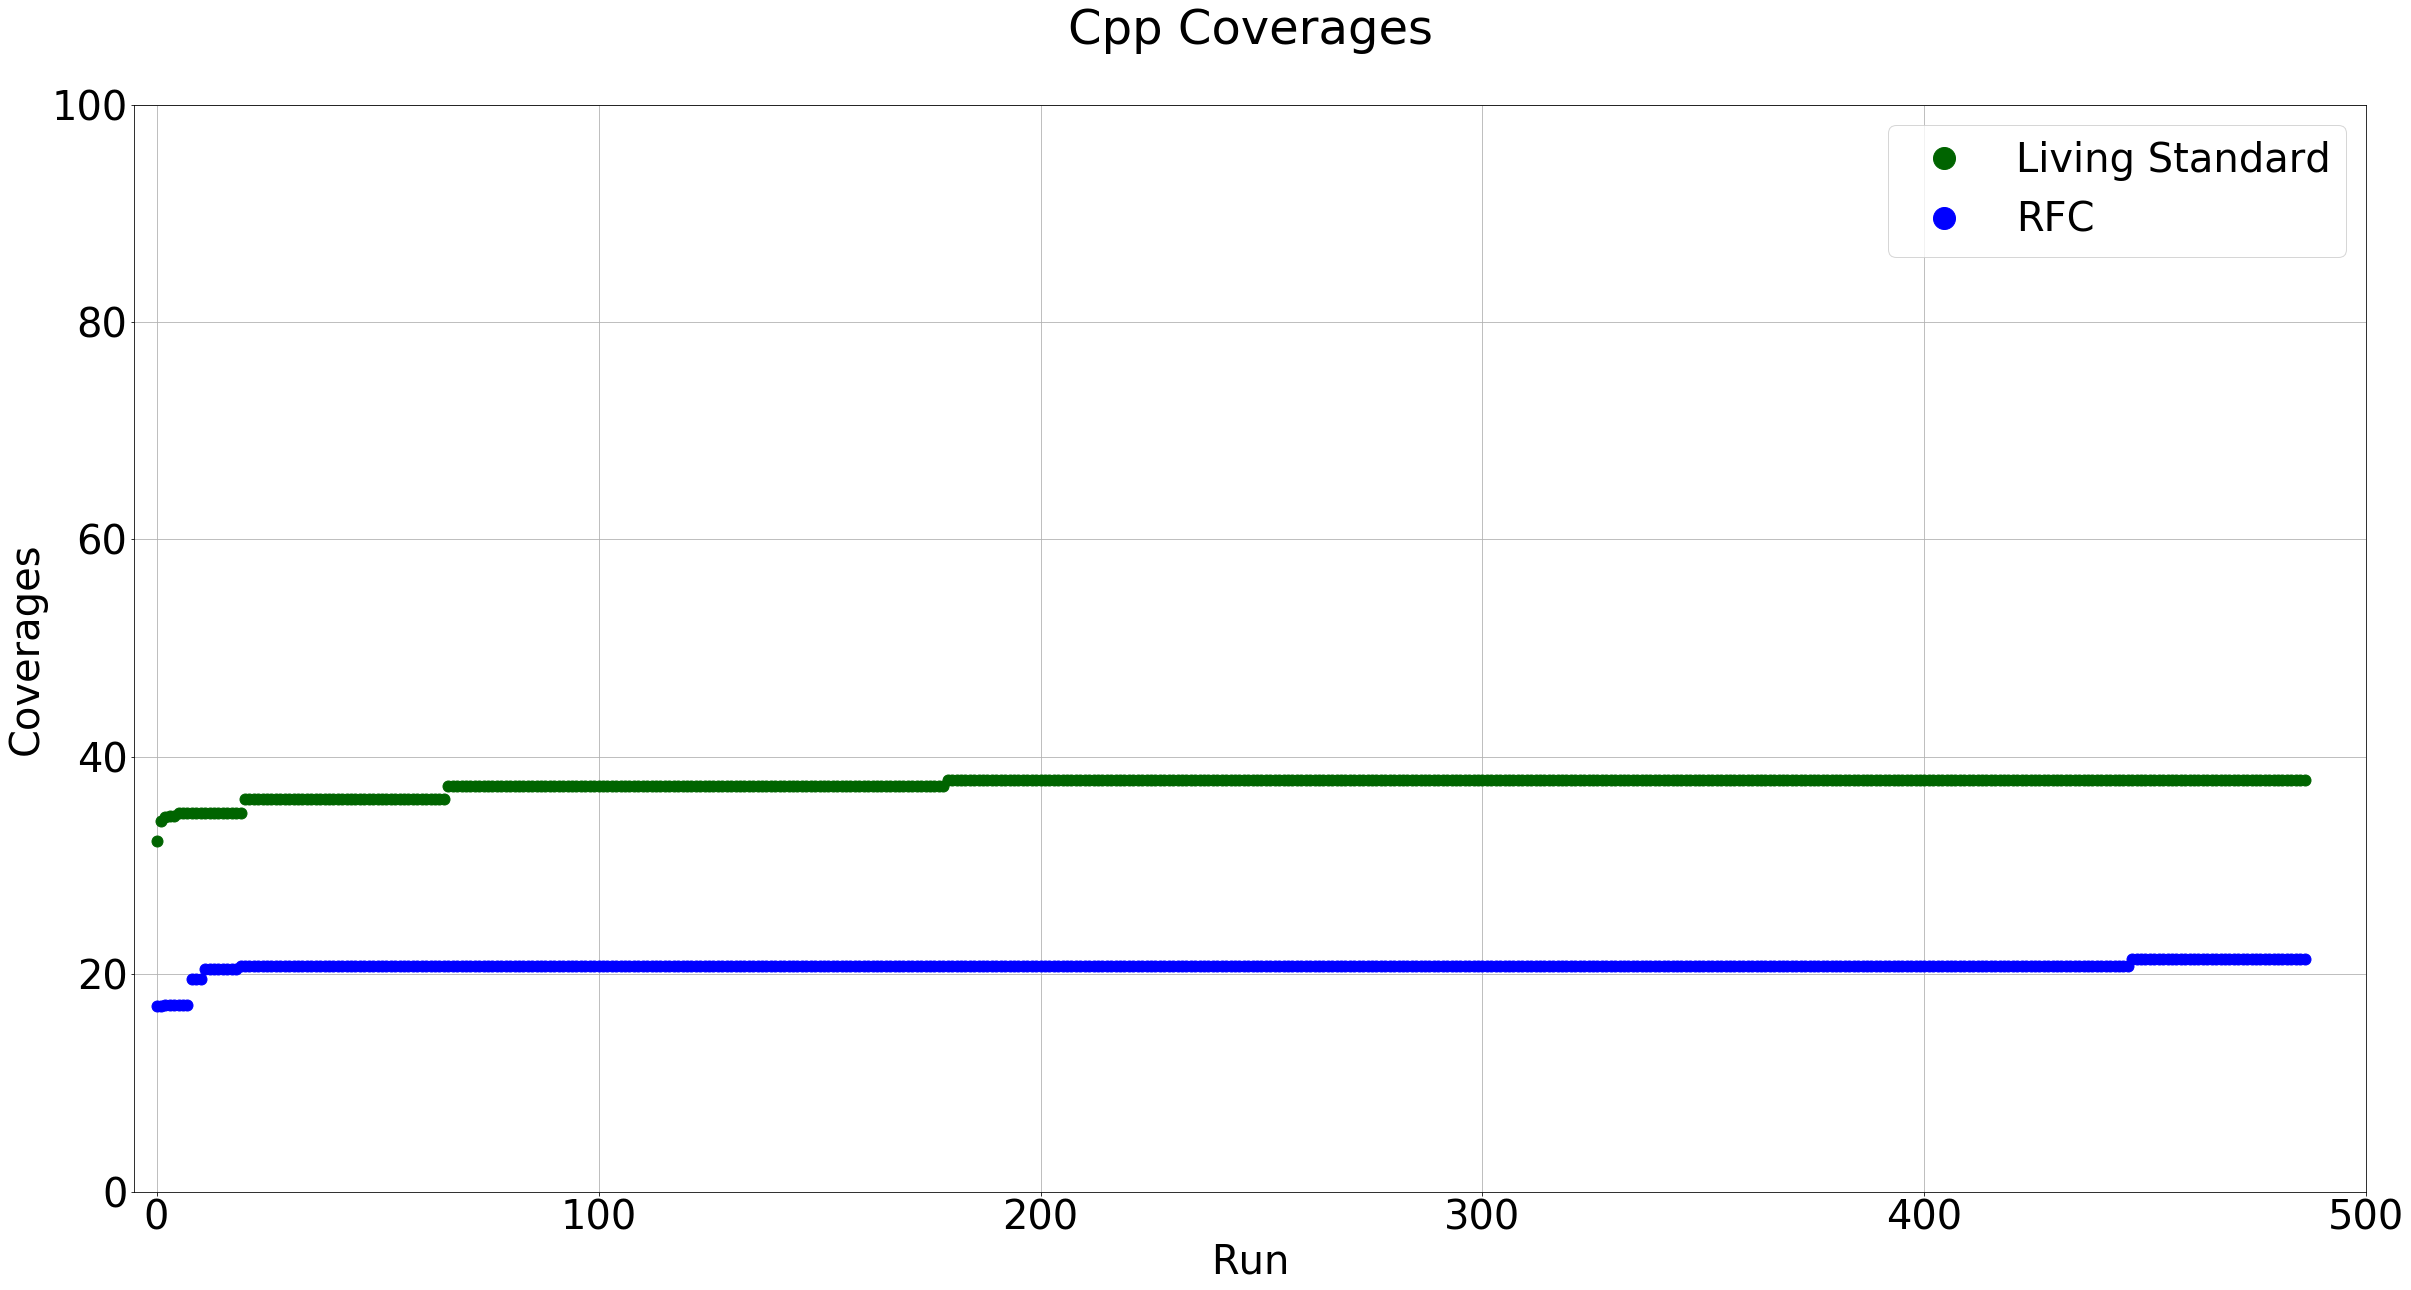

,Living Standard,RFC
count,487.000,487.000
mean,37.455,20.777
std,0.807,0.506
min,32.300,17.100
25%,37.300,20.800
50%,37.900,20.800
75%,37.900,20.800
max,37.900,21.400


Living Standard Max Coverage: 37.9%
Living Standard Max Coverage reached in: run 179
RFC Max Coverage: 21.4%
RFC Coverage reached in: run 447



### Go

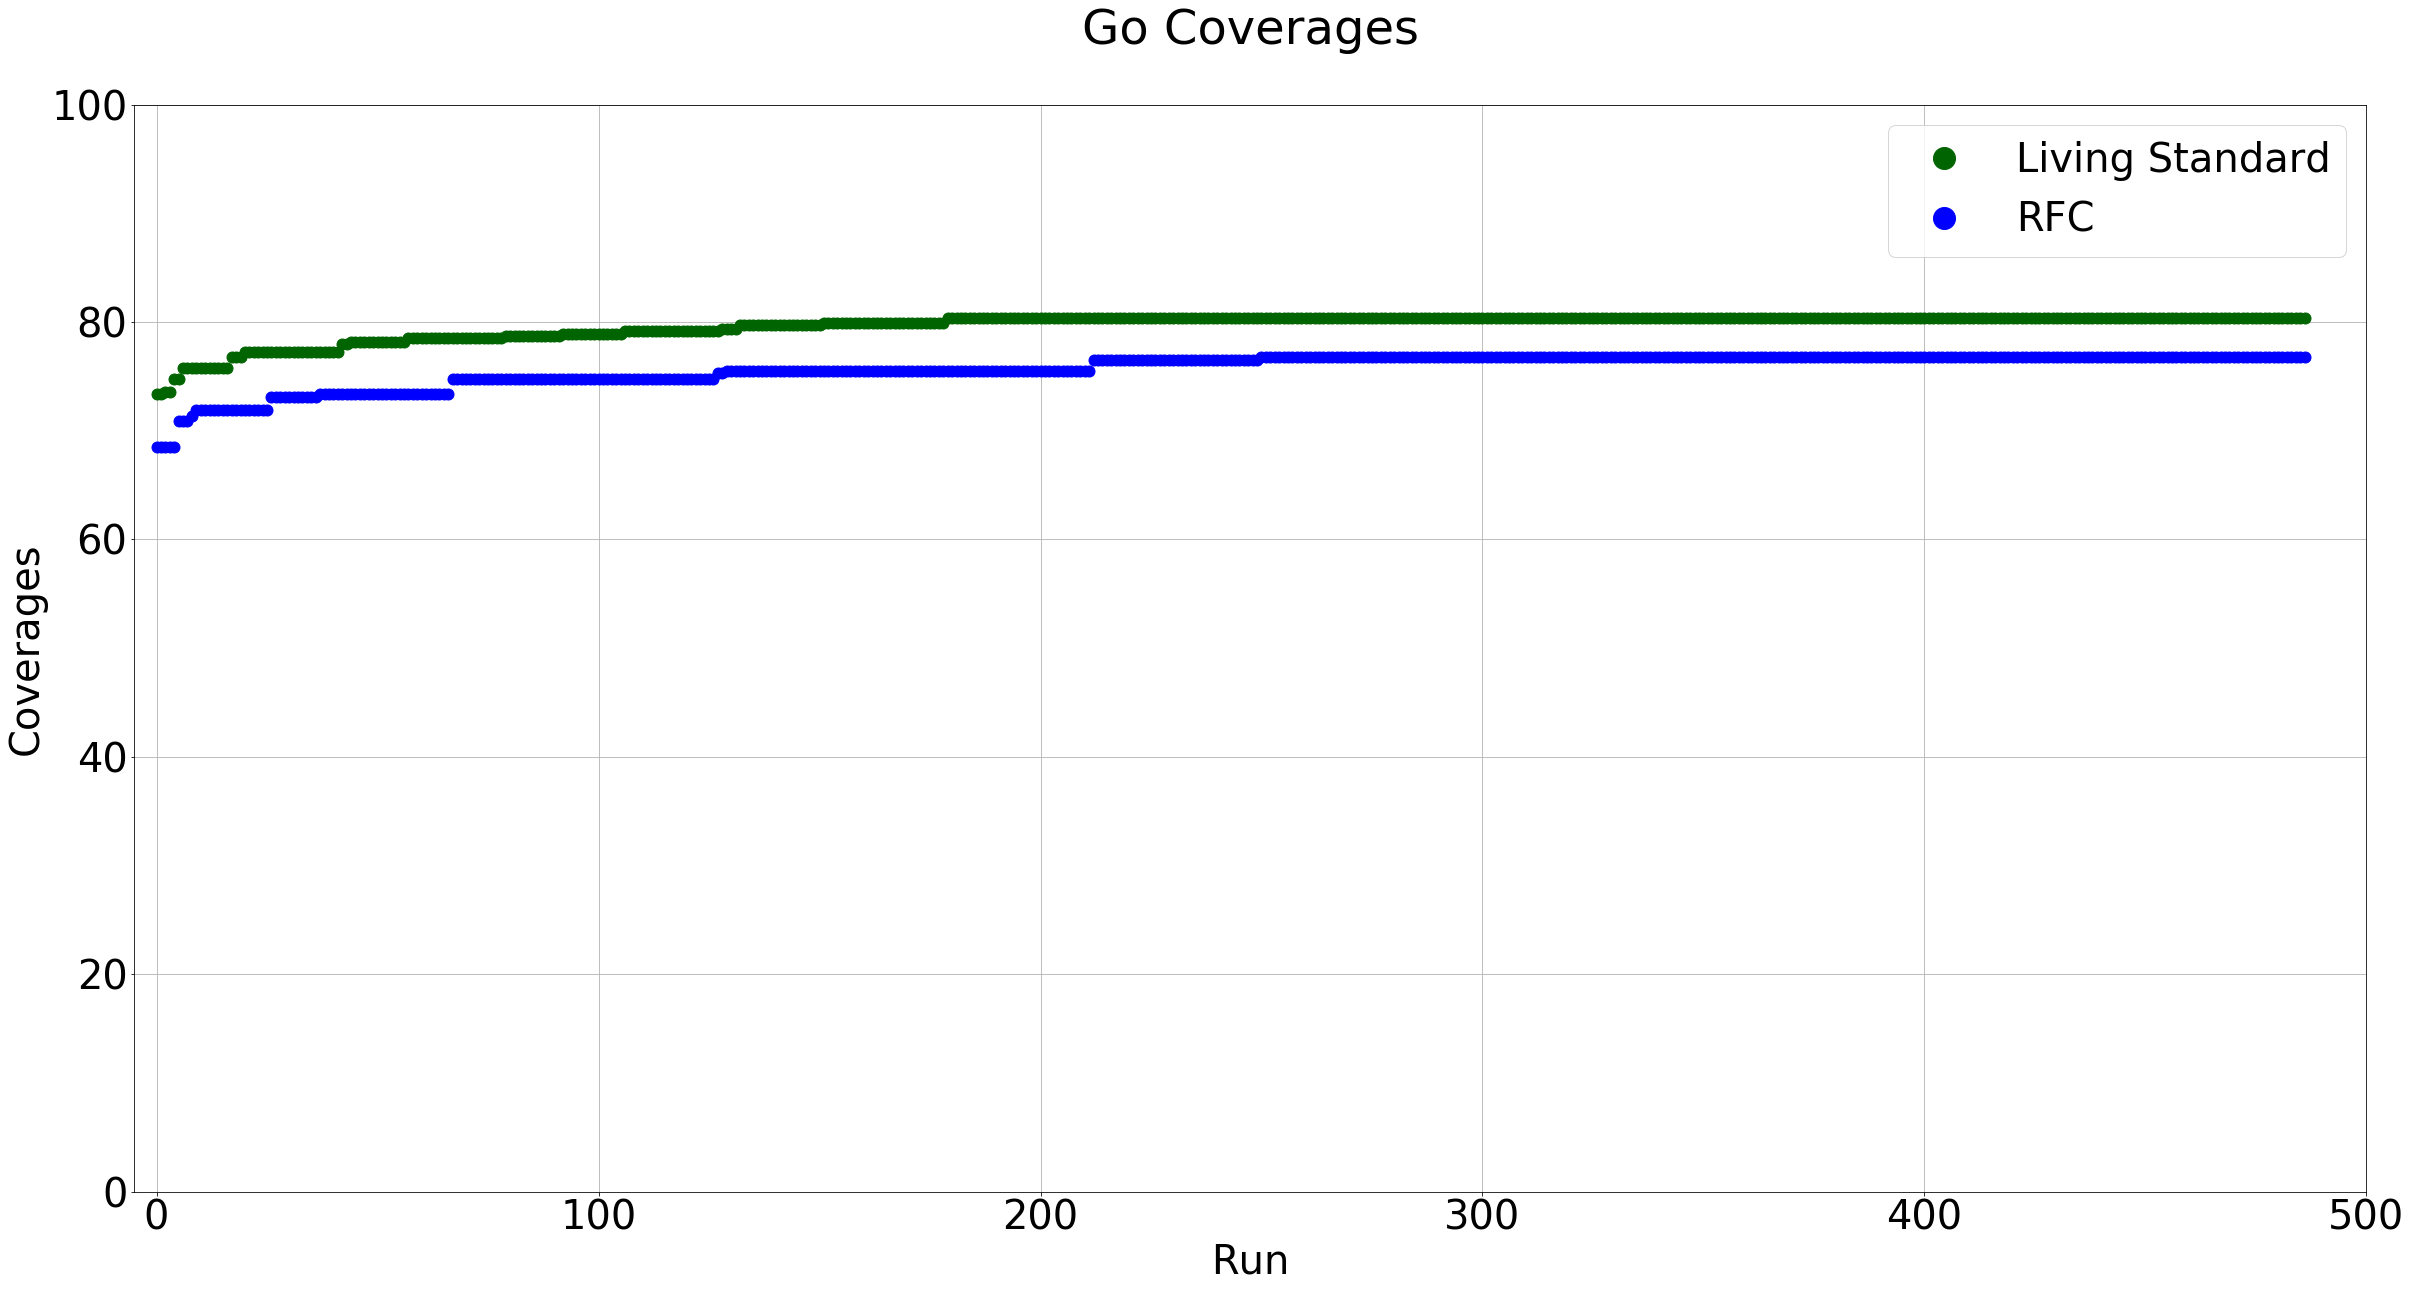

,Living Standard,RFC
count,487.000,487.000
mean,79.688,75.706
std,1.266,1.564
min,73.400,68.500
25%,79.200,74.800
50%,80.400,76.500
75%,80.400,76.800
max,80.400,76.800


Living Standard Max Coverage: 80.4%
Living Standard Max Coverage reached in: run 179
RFC Max Coverage: 76.8%
RFC Coverage reached in: run 250



### Java

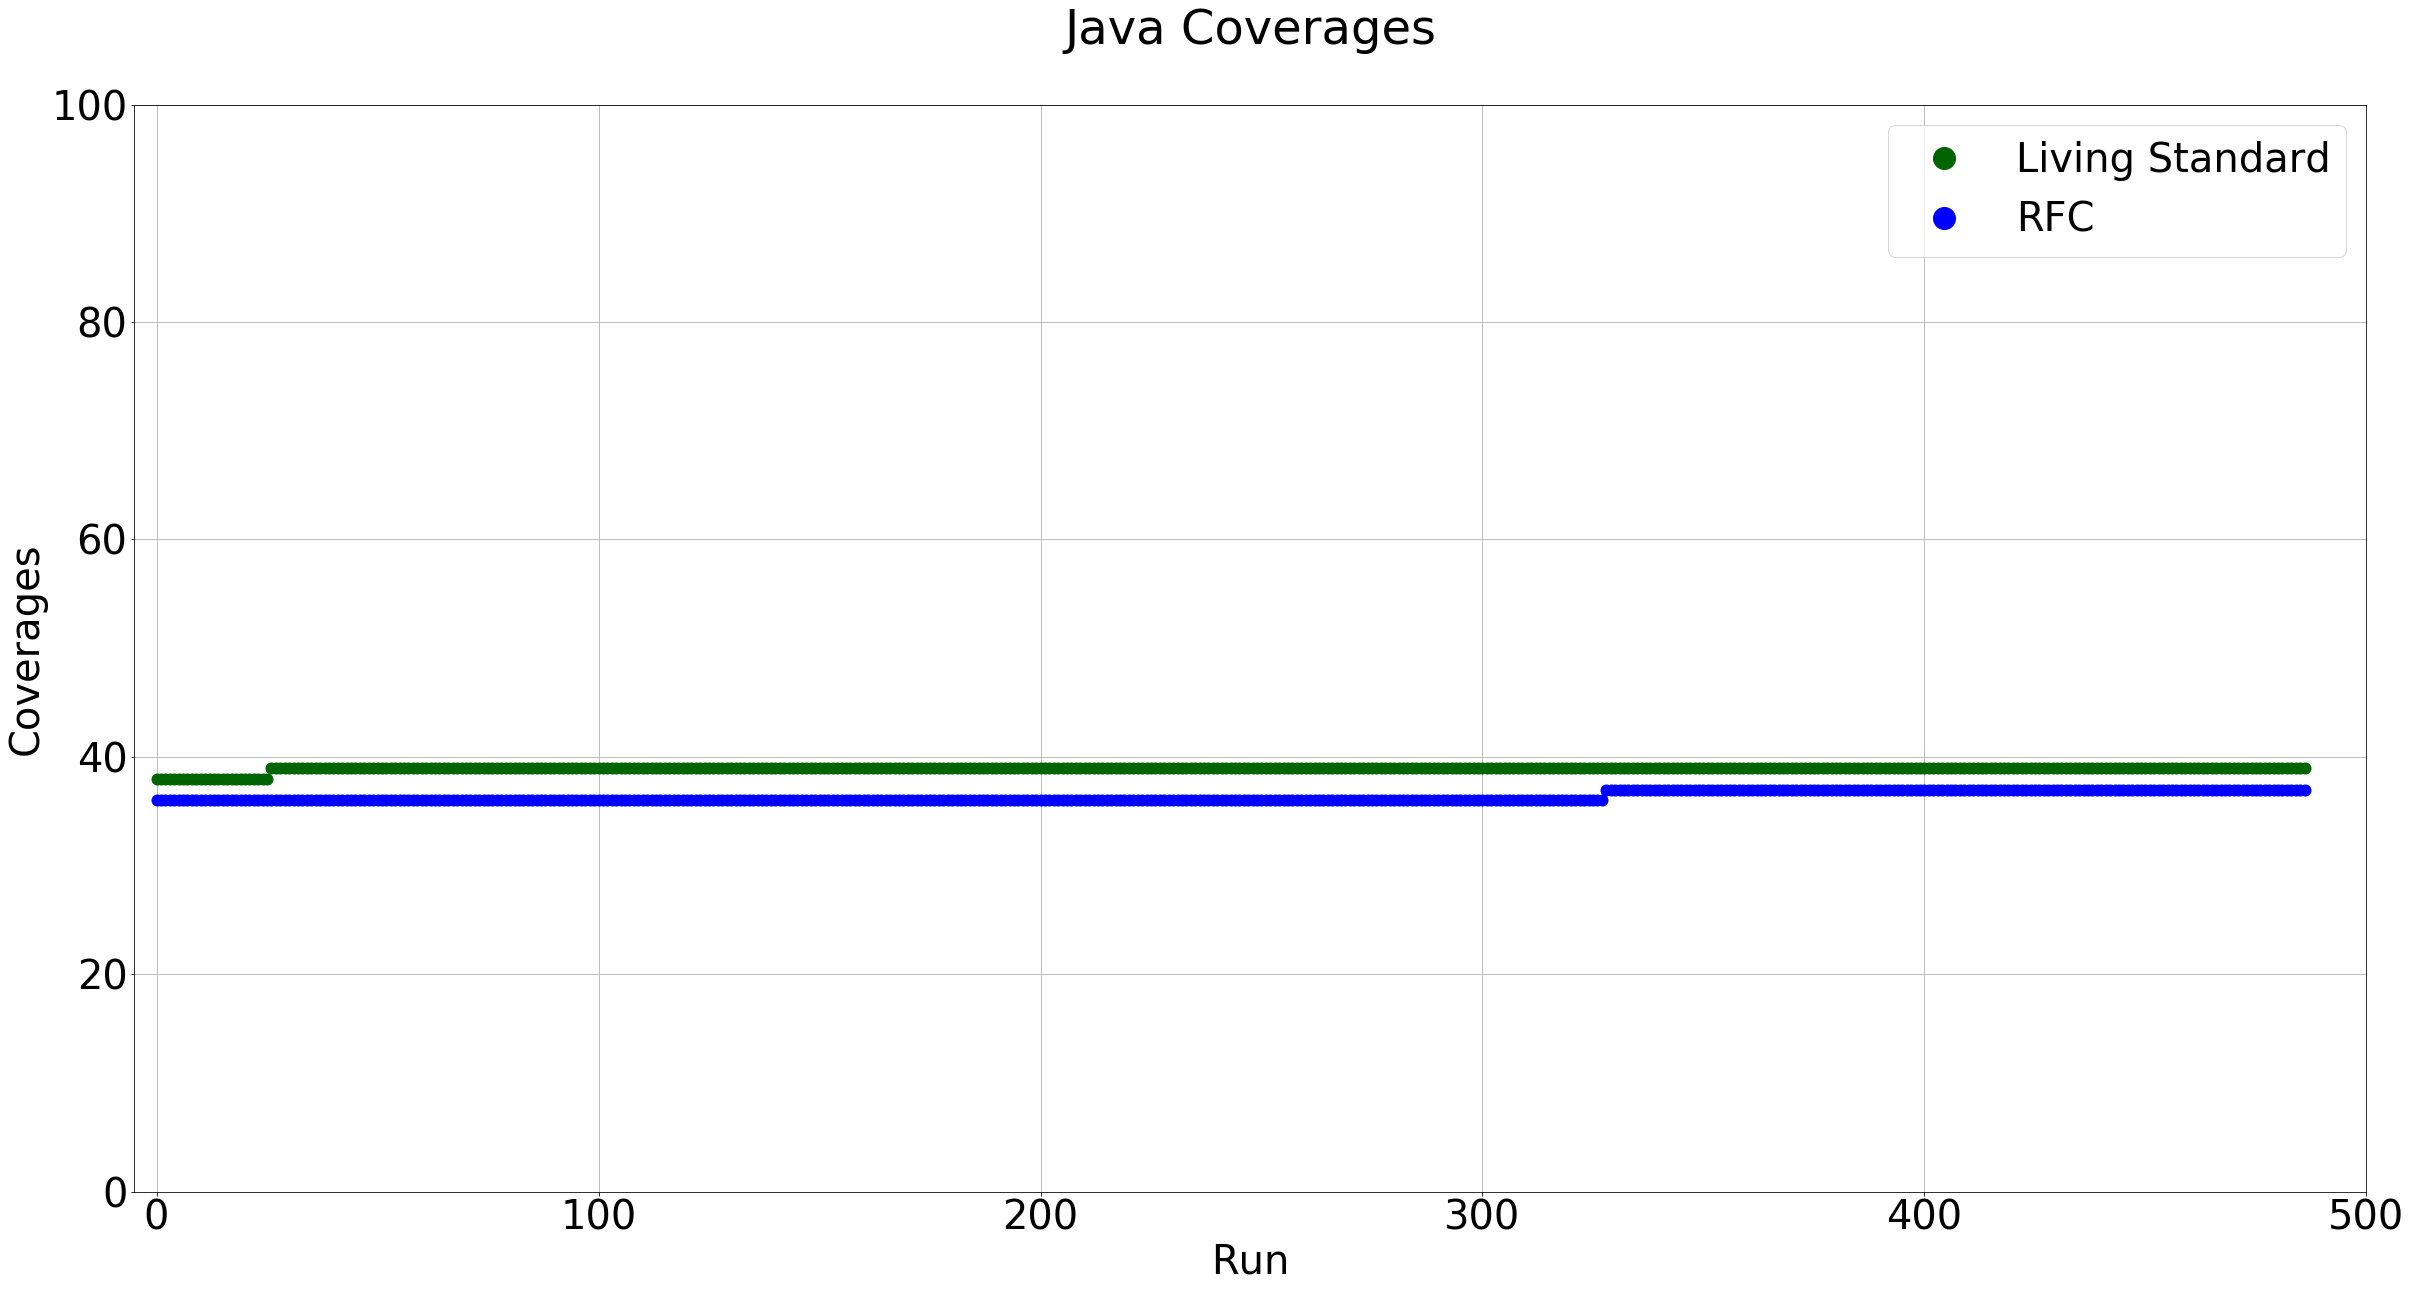

,Living Standard,RFC
count,487.000,487.000
mean,38.947,36.326
std,0.225,0.469
min,38.000,36.000
25%,39.000,36.000
50%,39.000,36.000
75%,39.000,37.000
max,39.000,37.000


Living Standard Max Coverage: 39.0%
Living Standard Max Coverage reached in: run 26
RFC Max Coverage: 37.0%
RFC Coverage reached in: run 328



### Javascripturijs

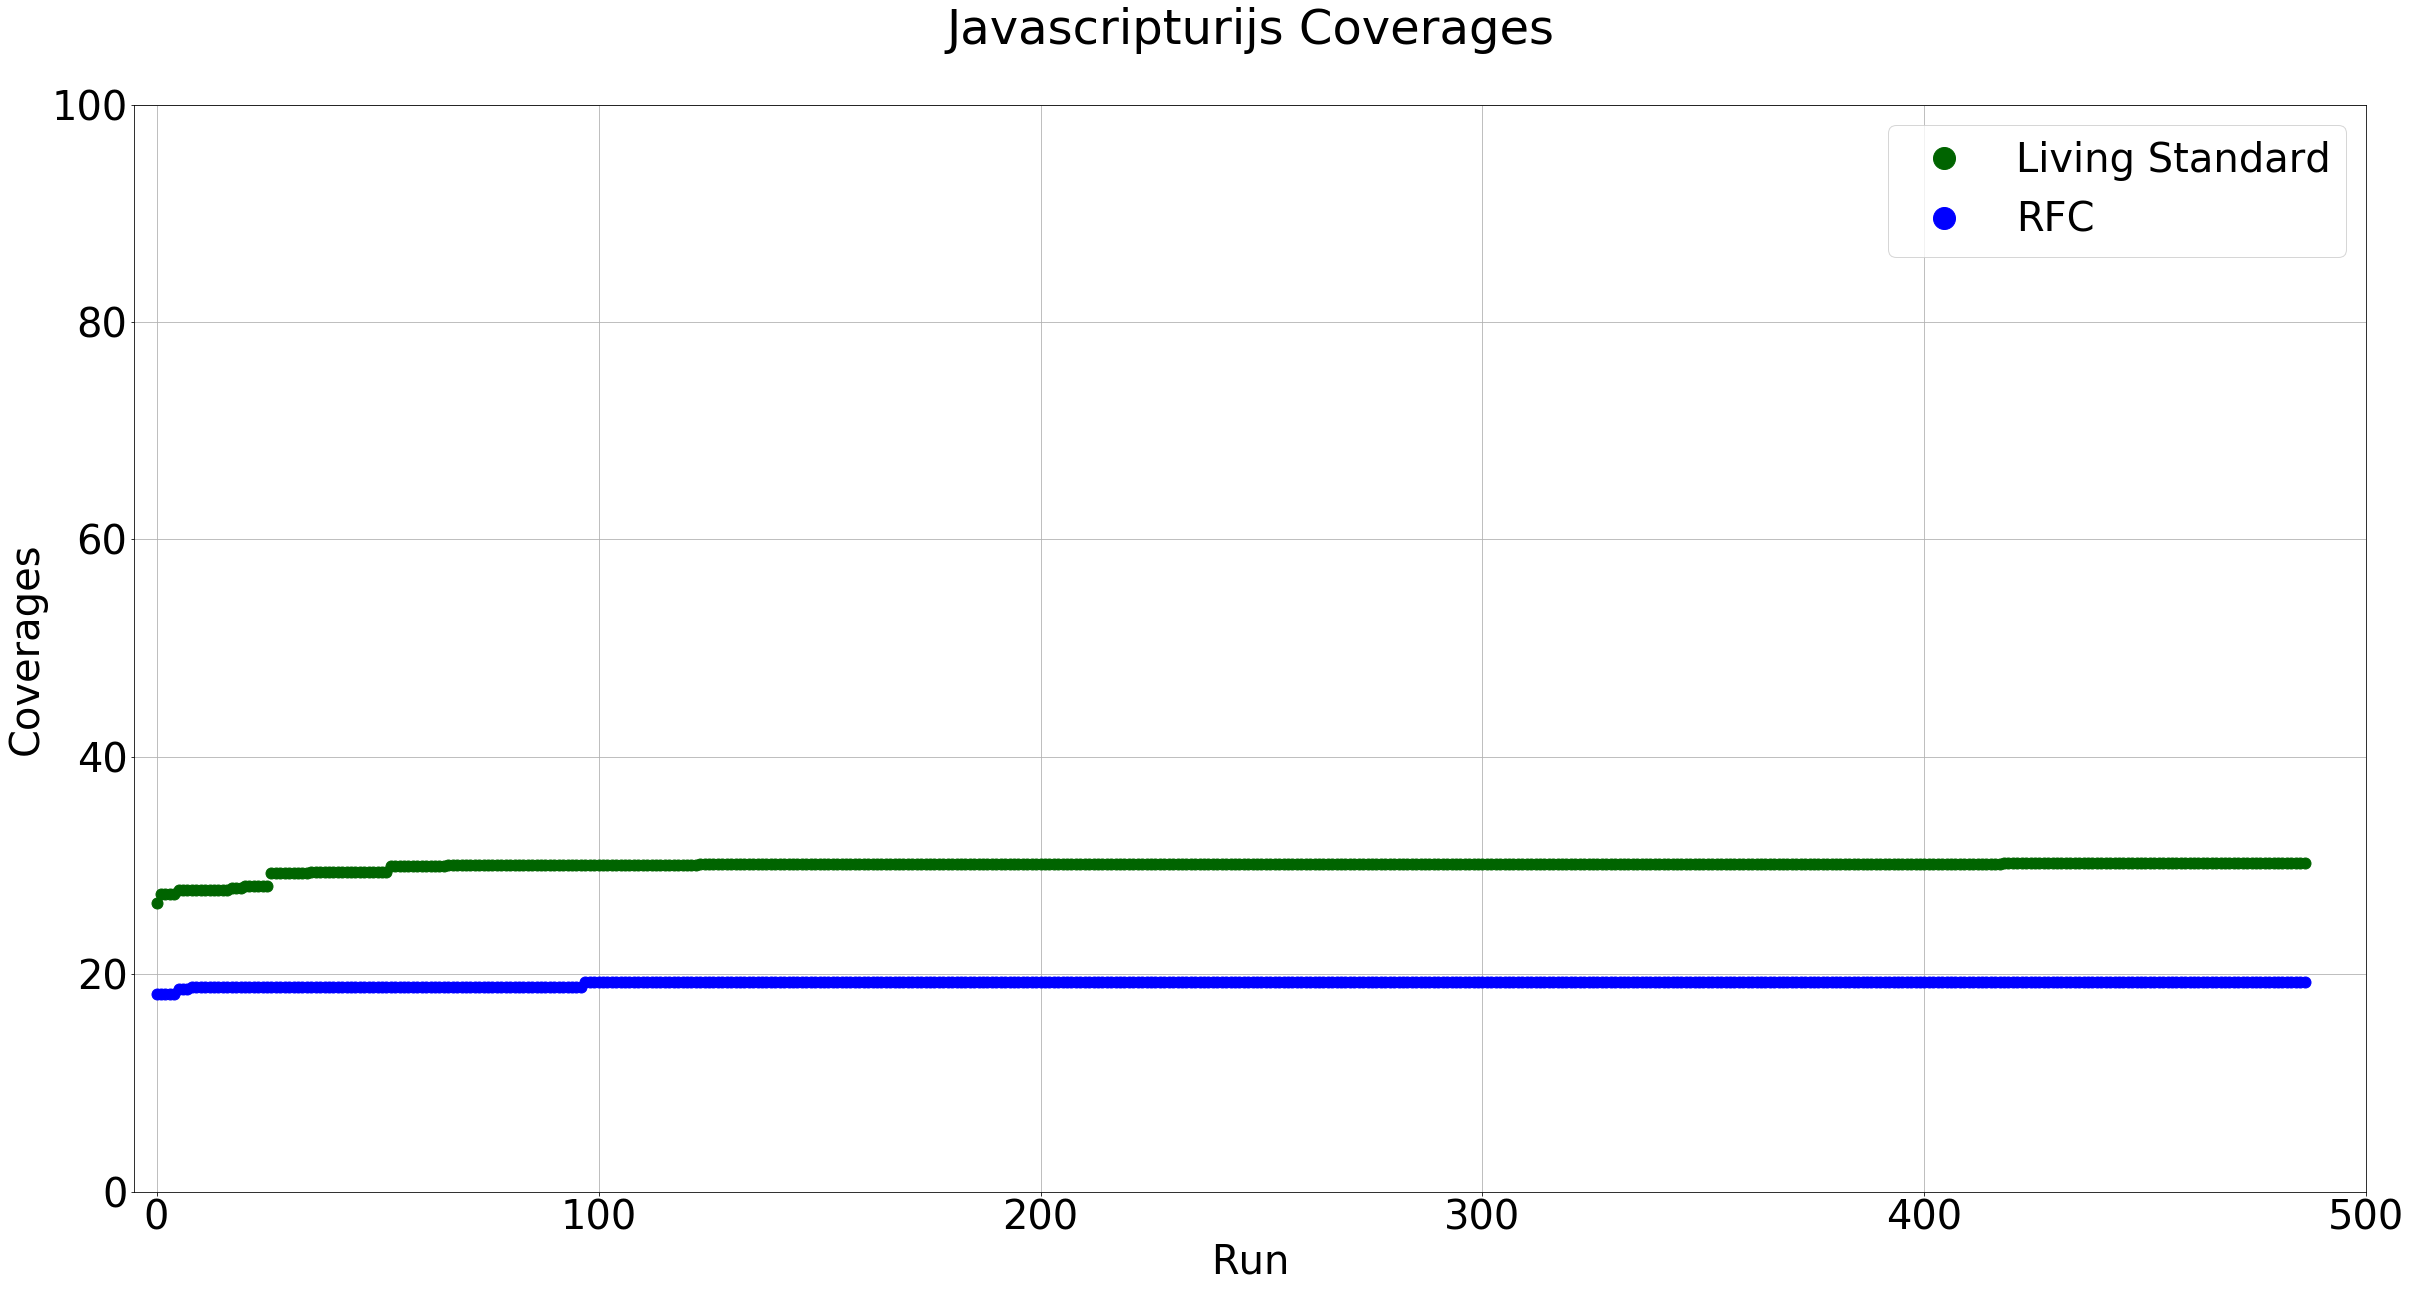

,Living Standard,RFC
count,487.000,487.000
mean,29.984,19.209
std,0.568,0.230
min,26.520,18.200
25%,30.070,19.320
50%,30.160,19.320
75%,30.160,19.320
max,30.240,19.320


Living Standard Max Coverage: 30.24%
Living Standard Max Coverage reached in: run 418
RFC Max Coverage: 19.32%
RFC Coverage reached in: run 97



### Javascriptwhatwg-url

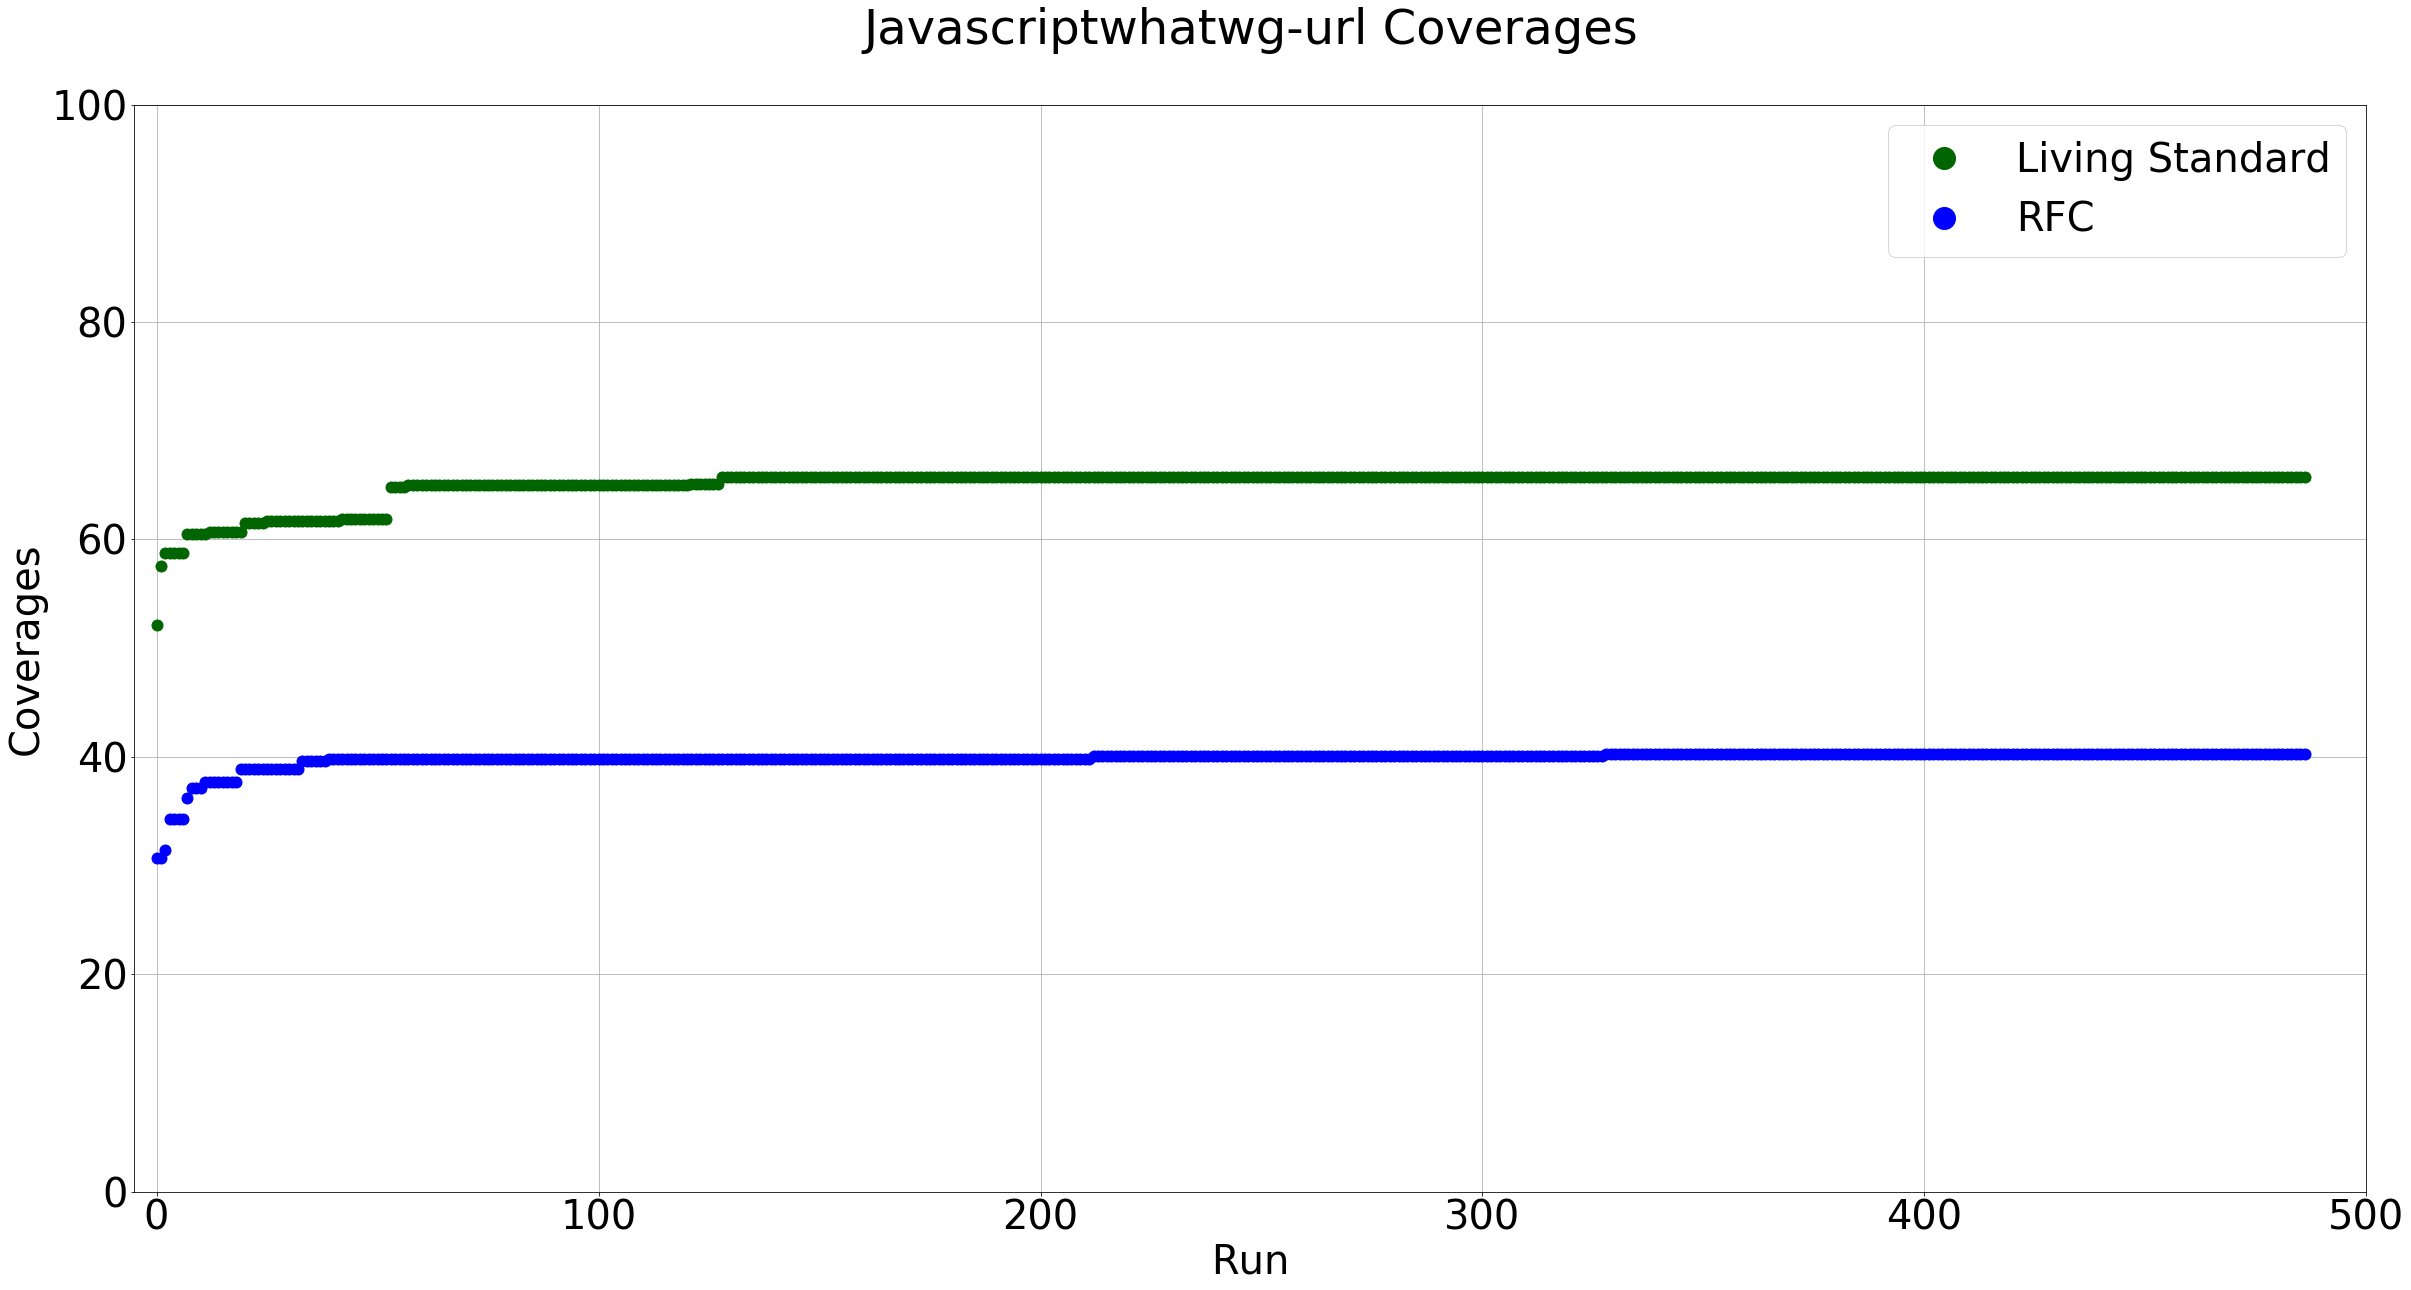

,Living Standard,RFC
count,487.000,487.000
mean,65.083,39.823
std,1.575,0.993
min,52.160,30.700
25%,65.130,39.790
50%,65.720,40.090
75%,65.720,40.240
max,65.720,40.240


Living Standard Max Coverage: 65.72%
Living Standard Max Coverage reached in: run 128
RFC Max Coverage: 40.24%
RFC Coverage reached in: run 328



### Php

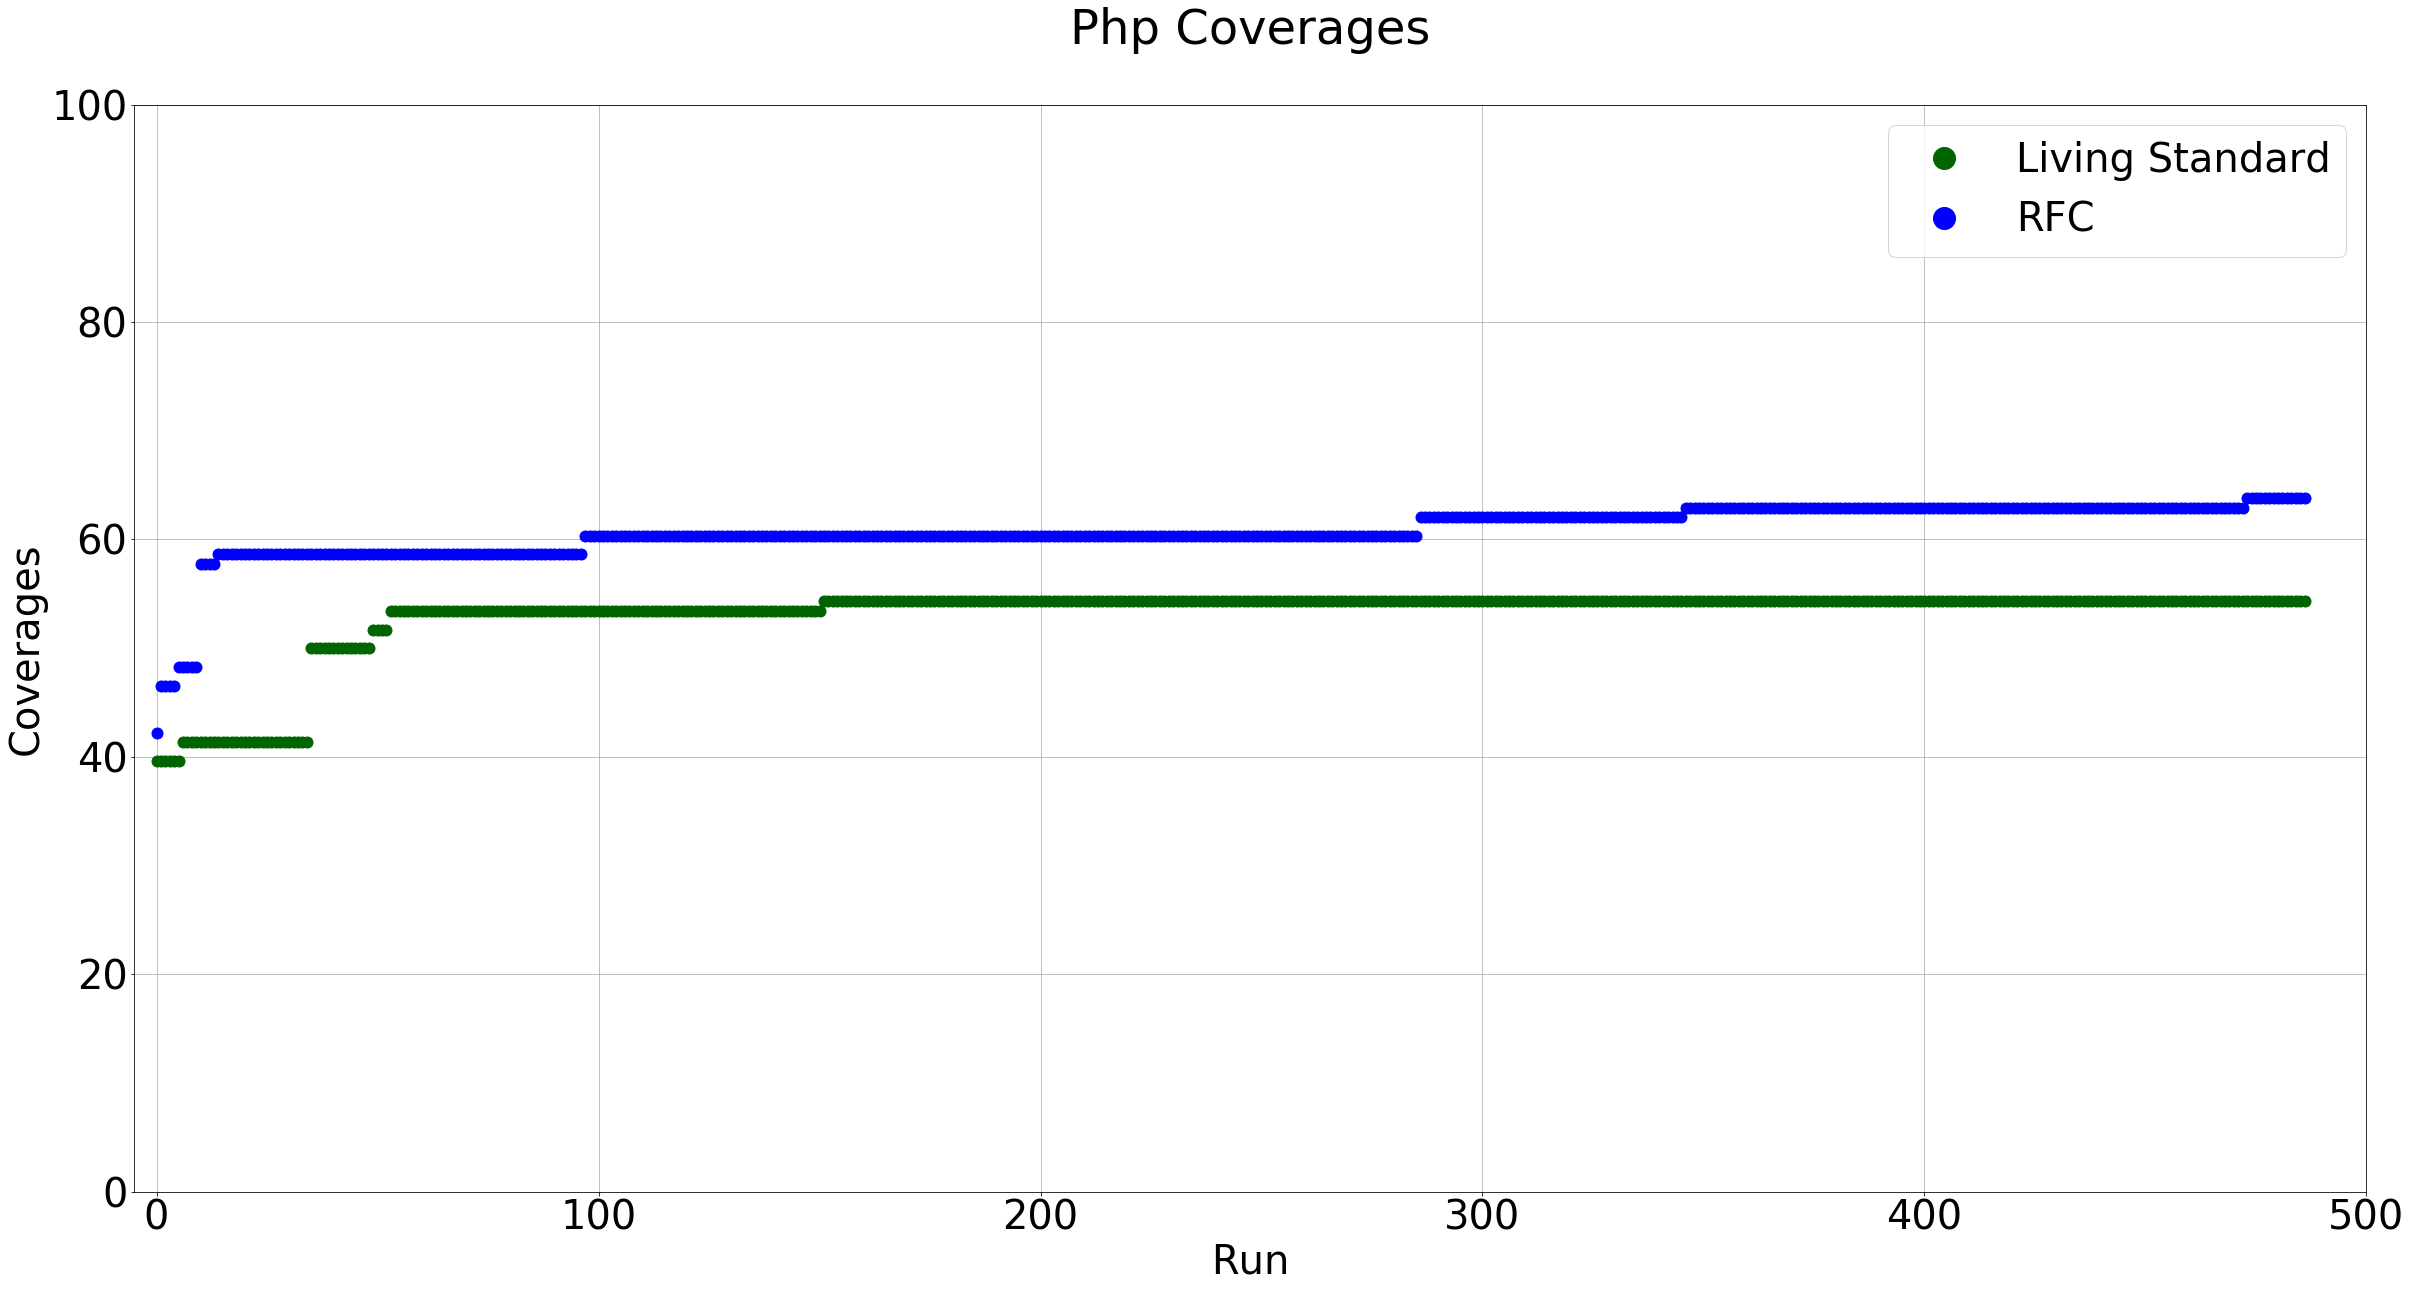

,Living Standard,RFC
count,487.000,487.000
mean,53.041,60.739
std,3.428,2.569
min,39.660,42.240
25%,53.450,60.340
50%,54.310,60.340
75%,54.310,62.930
max,54.310,63.790


Living Standard Max Coverage: 54.31%
Living Standard Max Coverage reached in: run 151
RFC Max Coverage: 63.79%
RFC Coverage reached in: run 473



### Python

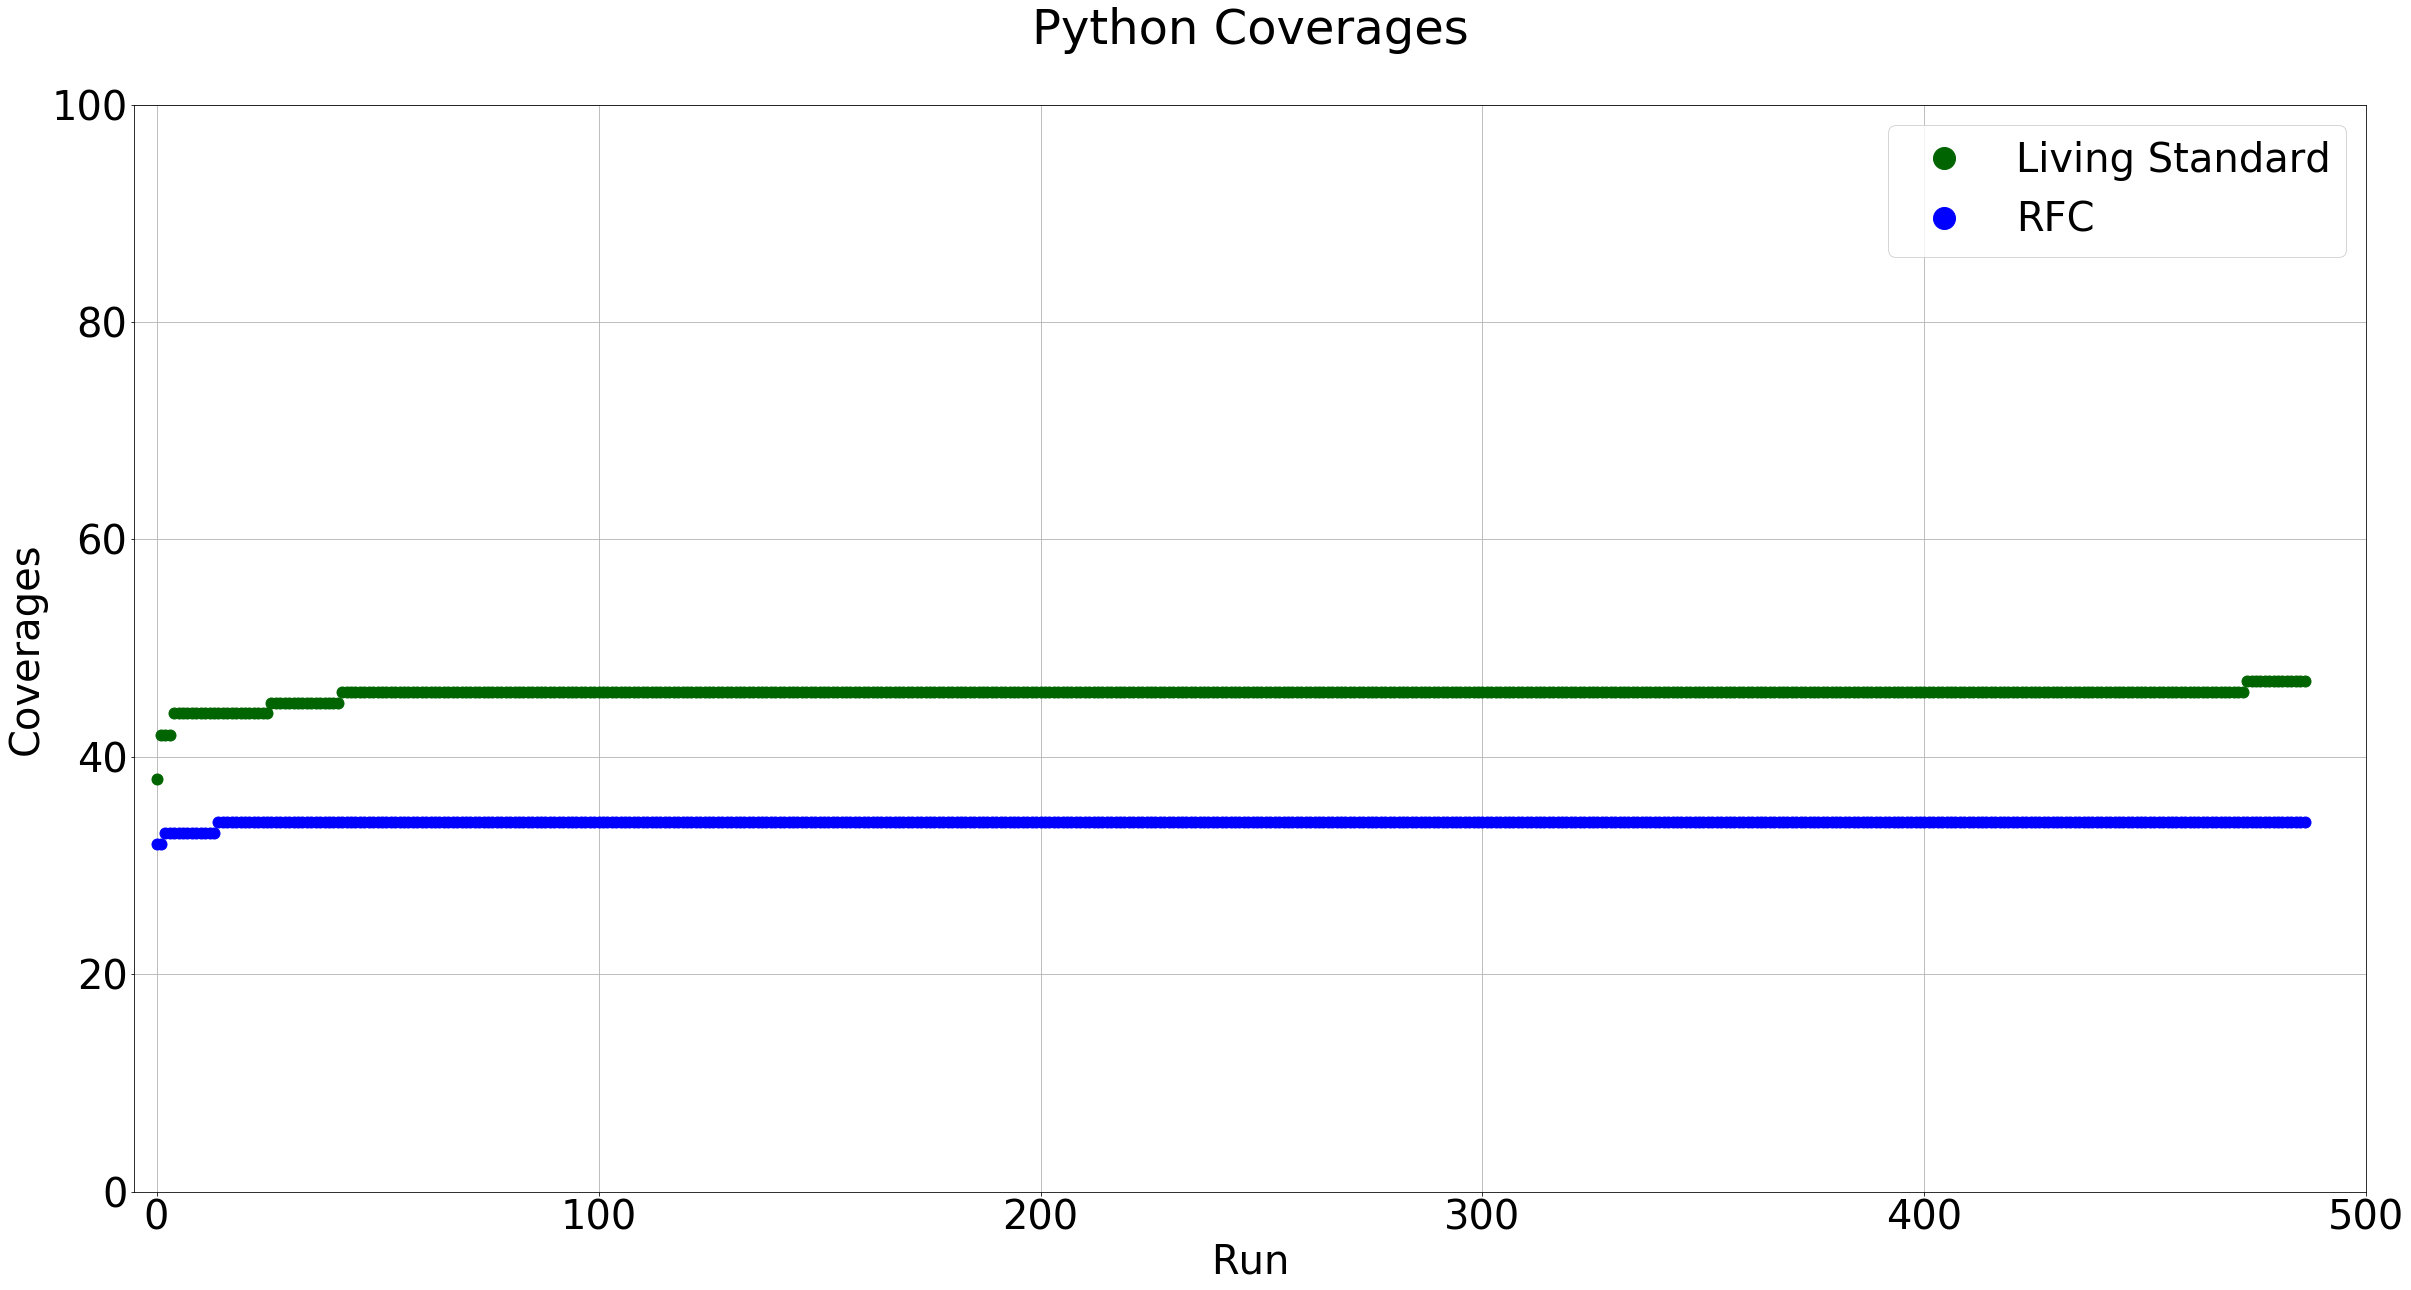

,Living Standard,RFC
count,487.000,487.000
mean,45.864,33.967
std,0.674,0.200
min,38.000,32.000
25%,46.000,34.000
50%,46.000,34.000
75%,46.000,34.000
max,47.000,34.000


Living Standard Max Coverage: 47.0%
Living Standard Max Coverage reached in: run 473
RFC Max Coverage: 34.0%
RFC Coverage reached in: run 14



### Ruby

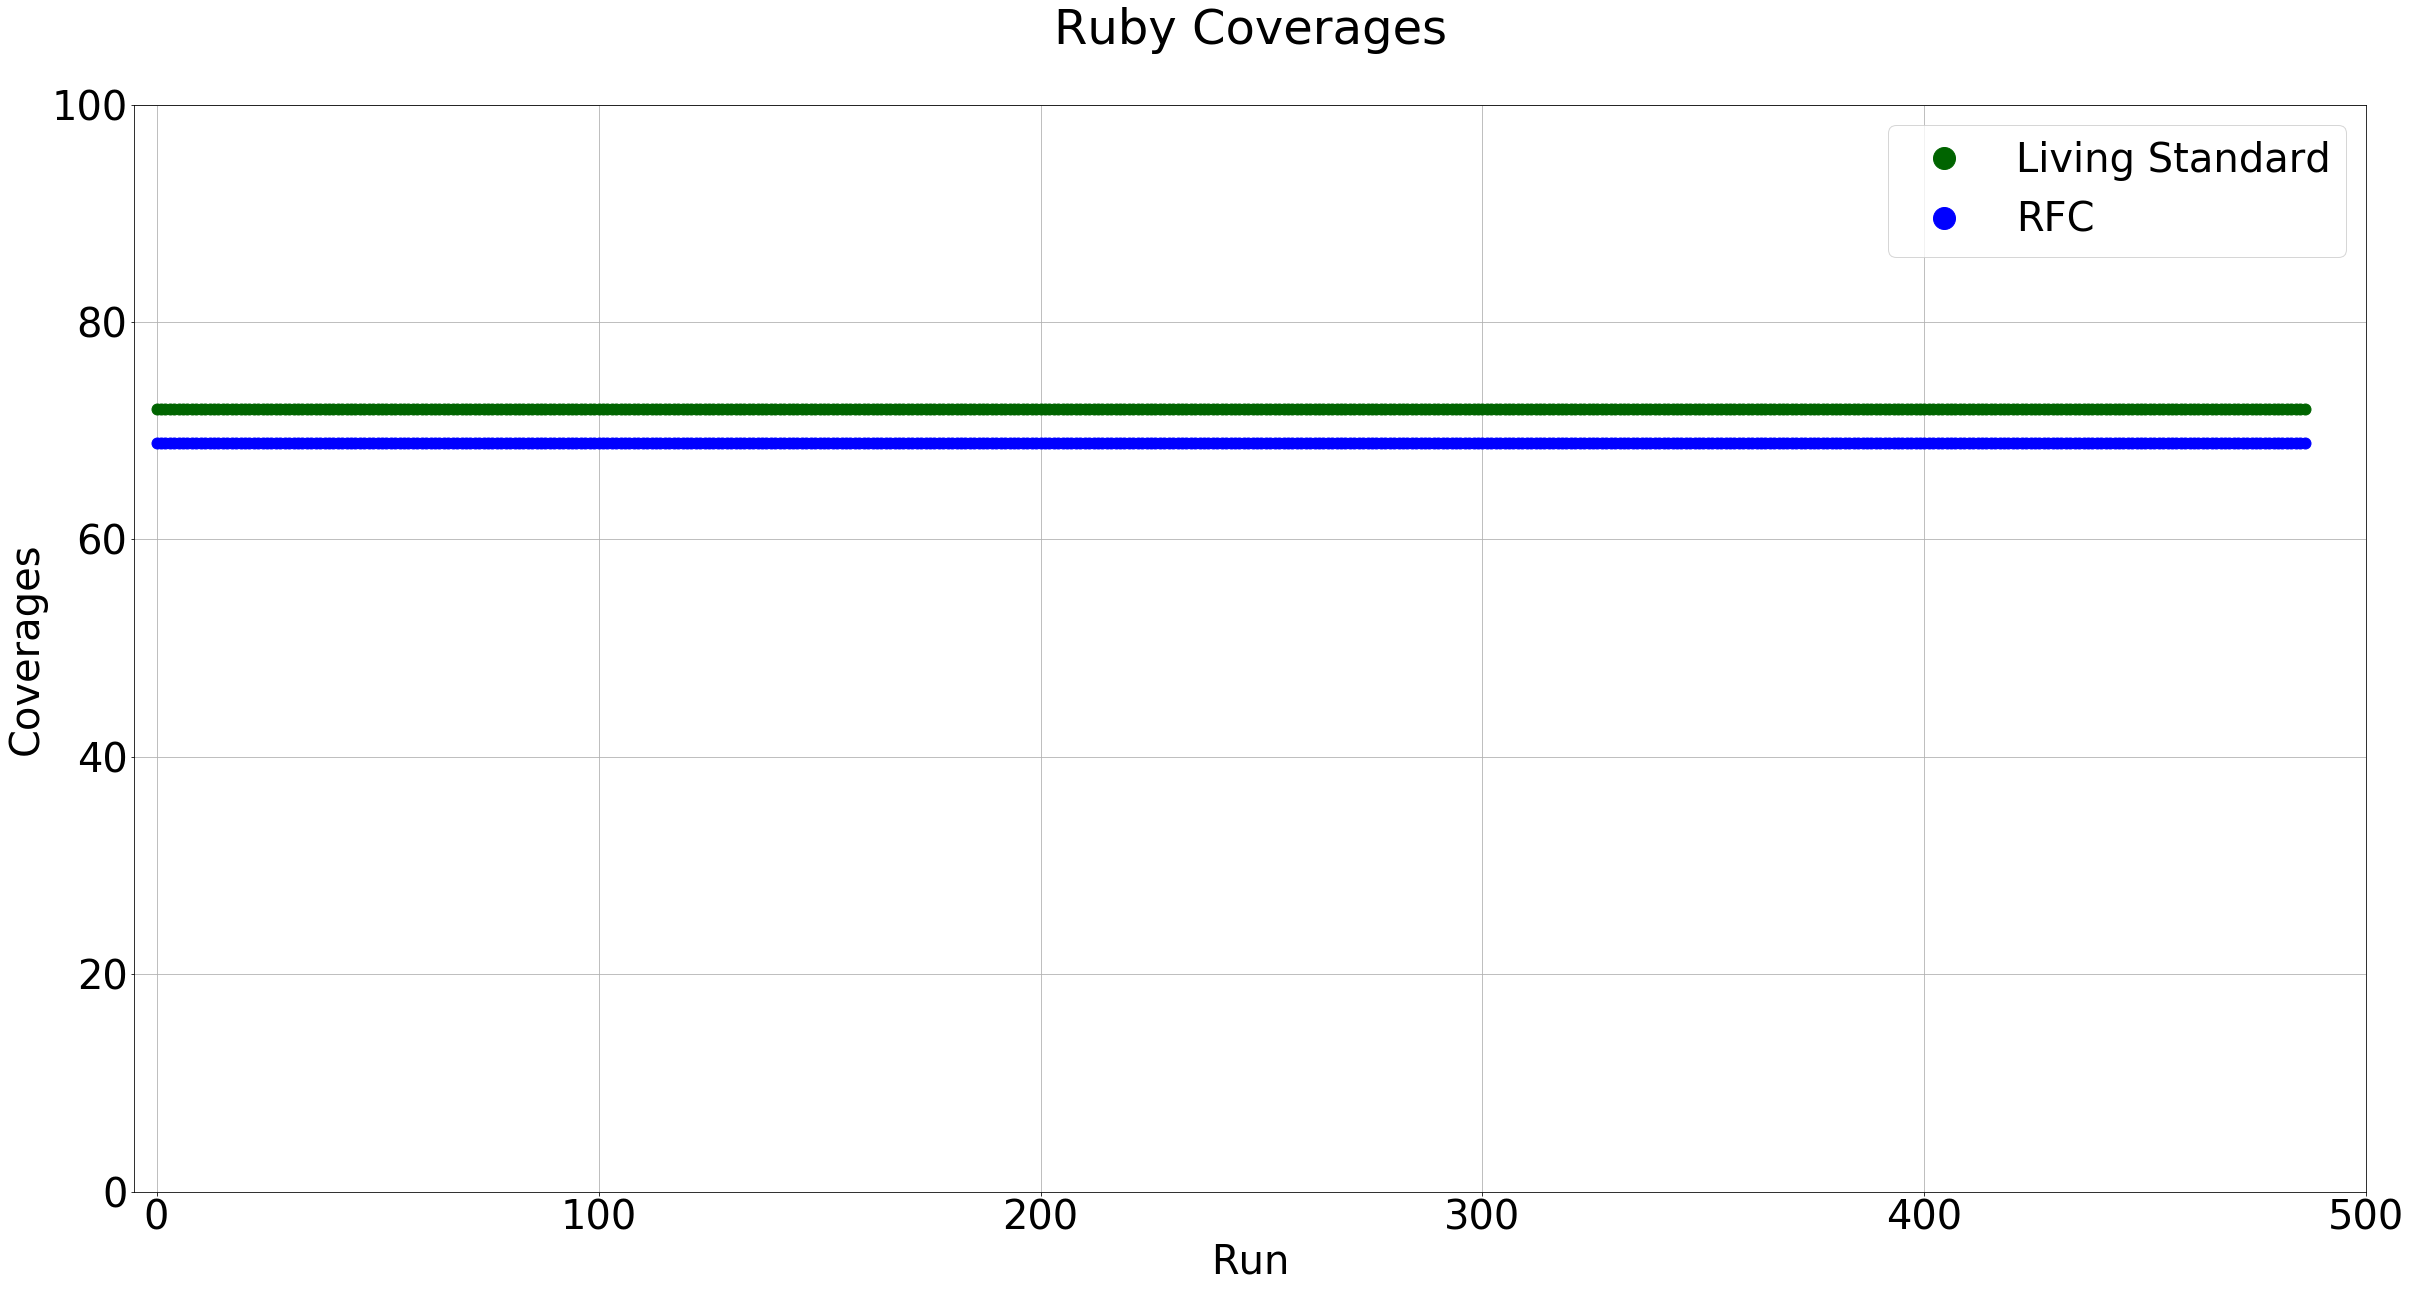

,Living Standard,RFC
count,487.000,487.000
mean,72.020,68.910
std,0.000,0.000
min,72.020,68.910
25%,72.020,68.910
50%,72.020,68.910
75%,72.020,68.910
max,72.020,68.910


Living Standard Max Coverage: 72.02%
Living Standard Max Coverage reached in: run 0
RFC Max Coverage: 68.91%
RFC Coverage reached in: run 0



In [14]:
dfs={}

for parser in parsers:
    dfs[parser]=compareGrammarResults(parser, ls_df, "Living Standard", rfc_df, "RFC")


